In [1]:
#Import Libraries
import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt   

from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# for Logistic Regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

# for LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
# Model Evaluation
from sklearn import metrics,model_selection

from scipy.stats import zscore
import os

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## 1.1.	Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [2]:
data = pd.read_excel(r"F:\Personal\PGP\Machine Learning\Project\Election_Data.xlsx",sheet_name = "Election_Dataset_Two Classes")

In [3]:
#the shape of the dataset
data.shape

(1525, 10)

In [4]:
print('The dataset has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 1525 rows and 10 columns


In [5]:
data.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [6]:
#drop unnamed: 0
data.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [8]:
data.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [11]:
data.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
#Check for null values
data.isnull().sum().sum()

0

In [13]:
dup = data.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))
data[dup]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [14]:
print('There are {} duplicates in the dataset'.format(data.duplicated().sum()))

There are 8 duplicates in the dataset


In [15]:
data.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

In [16]:
# Unique object values count
for column in data.columns:
    if data[column].dtype == 'object':
        print(column.upper(),': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [17]:
#Changing the name of the few variables who are having dot and replacing it with underscore.
data.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": 
                     "economic_cond_household","political.knowledge":"political_knowledge"},
          inplace=True)

## 1.2.	Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

## Univariate Analysis

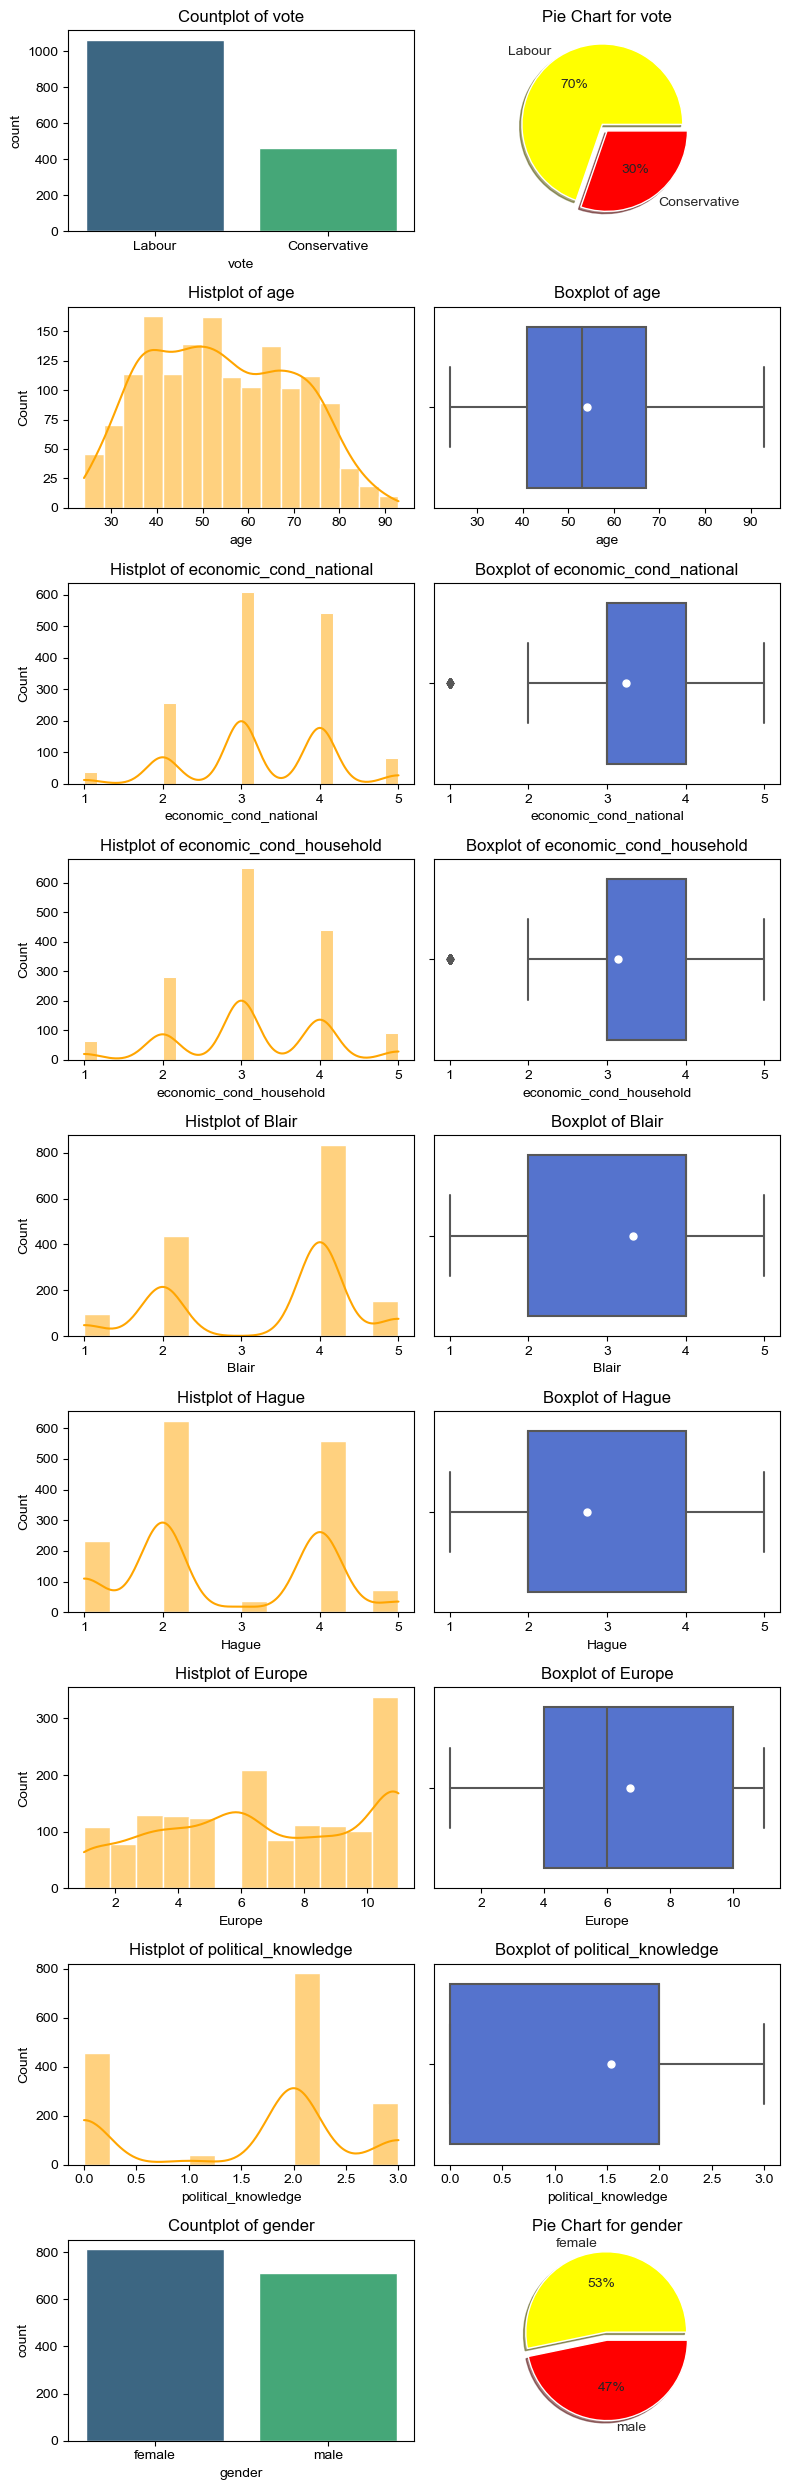

In [18]:
j=0
colors = ['yellow','red']
colors1=['royalblue','blue']
fig, axes = plt.subplots(nrows=9,ncols=2,squeeze=False)
fig.set_size_inches(8,25);
print('')
sns.set_style('whitegrid')
sns.set_style("whitegrid", {"grid.linestyle": " "})
for i in data.columns:
    if data.dtypes[i] != 'O':
        sns.histplot(x=data[i],color='orange',kde=True, ax=axes[j][0]).set(title='Histplot of {}'.format(i));
        sns.boxplot(x=i, color='royalblue',data=data, ax=axes[j][1],showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"white",
                      "markersize":"5"}).set(title='Boxplot of {}'.format(i));
        j=j+1
    else:
        sns.countplot(x=data[i], ax=axes[j][0],palette='viridis').set(title='Countplot of {}'.format(i));
        ax=axes[j][1]
        df = data[i].value_counts()
        #ax.title = 'Pie Chart' 
        ax.pie(df, labels=df.index, autopct="%.0f%%",colors=colors,explode=(0.1,0),shadow=True);
        ax.set(title="Pie Chart for {}".format(i))
        #plt.pie(labels=data[i].value_counts()[0],x=data[i].value_counts()[1])
        j=j+1
plt.tight_layout();   
plt.show();    

In [19]:
#Mean of voters
data[data.vote == "Labour"].age.mean()

53.01411100658514

In [20]:
#Mean of Conservative
data[data.vote == "Conservative"].age.mean()

56.87012987012987

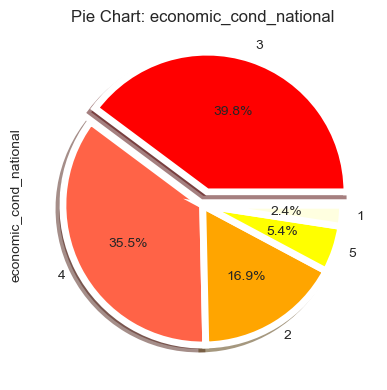

In [21]:
plt.figure(figsize=(4,4))
value = round(data['economic_cond_national'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0,0)
colors = ['red','tomato','orange','yellow','lightyellow']
data.economic_cond_national.value_counts(normalize=True).plot(kind='pie', shadow = True, explode = explode, wedgeprops = {'linewidth': 5},colors = colors,  autopct='%1.1f%%')
plt.title('Pie Chart: economic_cond_national')
plt.tight_layout();

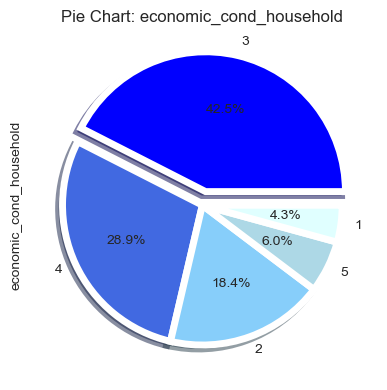

In [22]:
plt.figure(figsize=(4,4))
value = round(data['economic_cond_household'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0,0)
colors = ['blue','royalblue','lightskyblue','lightblue','lightcyan']
data.economic_cond_household.value_counts(normalize=True).plot(kind='pie', shadow = True, explode = explode, wedgeprops = {'linewidth': 5},colors = colors,  autopct='%1.1f%%')
plt.title('Pie Chart: economic_cond_household')
plt.tight_layout();

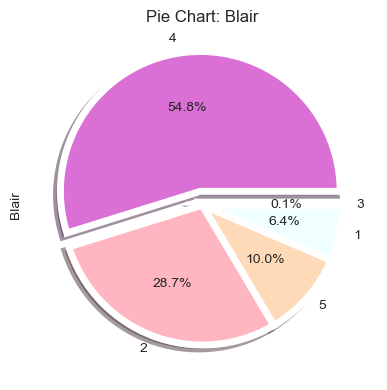

In [23]:
plt.figure(figsize=(4,4))
value = round(data['Blair'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0,0)
colors = ['orchid','lightpink','peachpuff','azure', 'lightgrey']
data.Blair.value_counts(normalize=True).plot(kind='pie', shadow = True, explode = explode, wedgeprops = {'linewidth': 5},colors = colors,  autopct='%1.1f%%')
plt.title('Pie Chart: Blair')
plt.tight_layout();

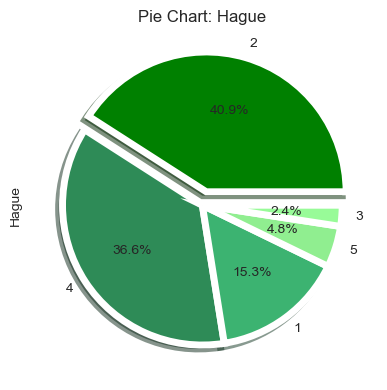

In [24]:
plt.figure(figsize=(4,4))
value = round(data['Hague'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0,0)
colors = ['green','seagreen', 'mediumseagreen','lightgreen','palegreen']
data.Hague.value_counts(normalize=True).plot(kind='pie', shadow = True, explode = explode, wedgeprops = {'linewidth': 5},colors = colors,  autopct='%1.1f%%')
plt.title('Pie Chart: Hague')
plt.tight_layout();

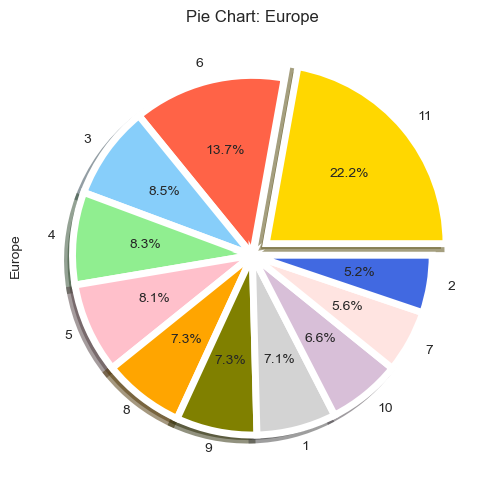

In [25]:
plt.figure(figsize=(5,5))
value = round(data['Europe'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['gold','tomato','lightskyblue','lightgreen','pink', 'orange', 'olive', 'lightgrey', 'thistle', 'mistyrose', 'royalblue']
data.Europe.value_counts(normalize=True).plot(kind='pie', shadow = True, explode = explode, wedgeprops = {'linewidth': 5},colors = colors,  autopct='%1.1f%%')
plt.title('Pie Chart: Europe')
plt.tight_layout();

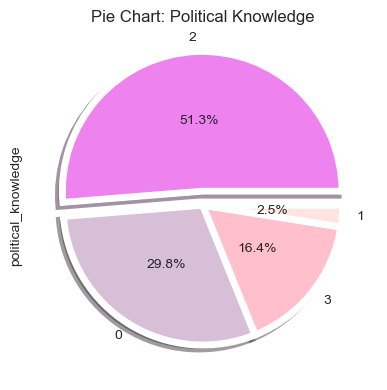

In [26]:
value = round(data['political_knowledge'].value_counts(normalize = True),2)*100
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(4,4))
colors = ['violet','thistle','pink','mistyrose']
data.political_knowledge.value_counts(normalize=True).plot(kind='pie', shadow = True, center=(0,0), labeldistance = 1.1, pctdistance=0.5, wedgeprops = {'linewidth': 5}, explode = explode, colors = colors, autopct='%1.1f%%')
plt.title('Pie Chart: Political Knowledge')
plt.tight_layout();

## Bivariate Analysis

economic_cond_national


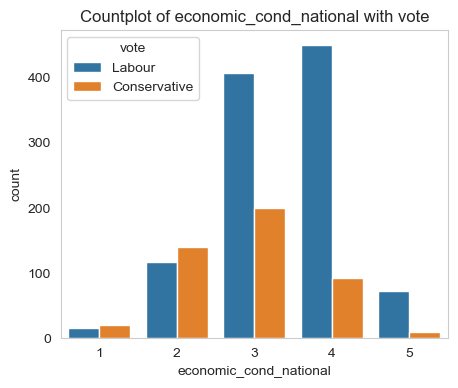

economic_cond_household


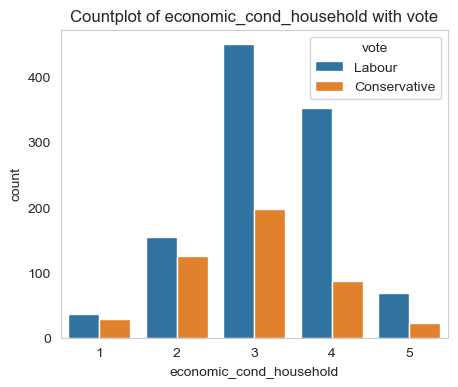

Blair


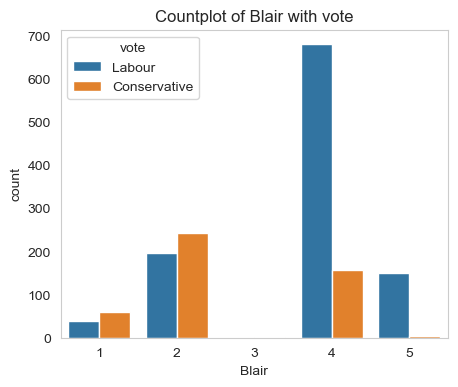

Hague


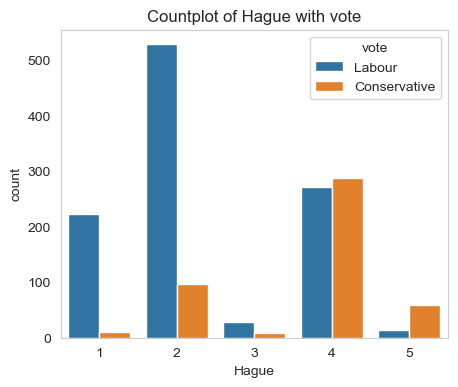

Europe


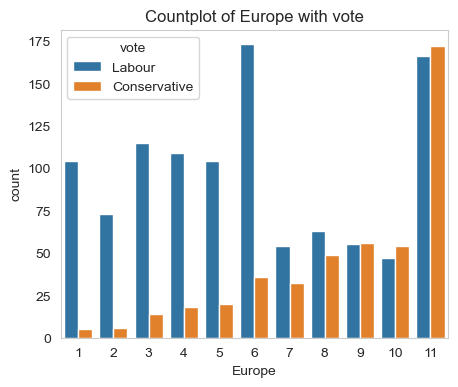

political_knowledge


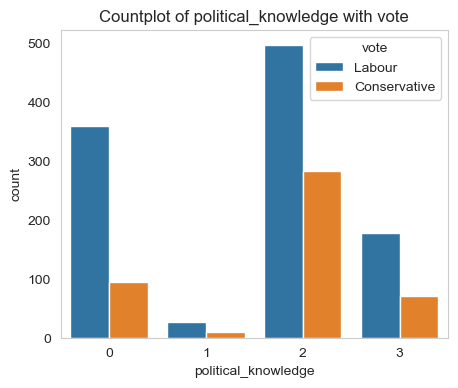

gender


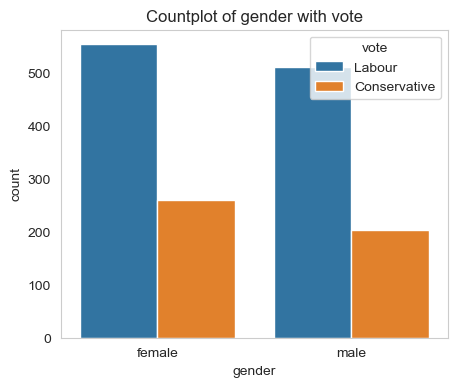

In [27]:
for i in data.columns:
    if(i!='vote' and i!='age'):
        print(i)
        plt.figure(figsize=(5,4))
        sns.countplot(data[i],hue=data['vote']).set(title = 'Countplot of {} with vote'.format(i))
    plt.show();

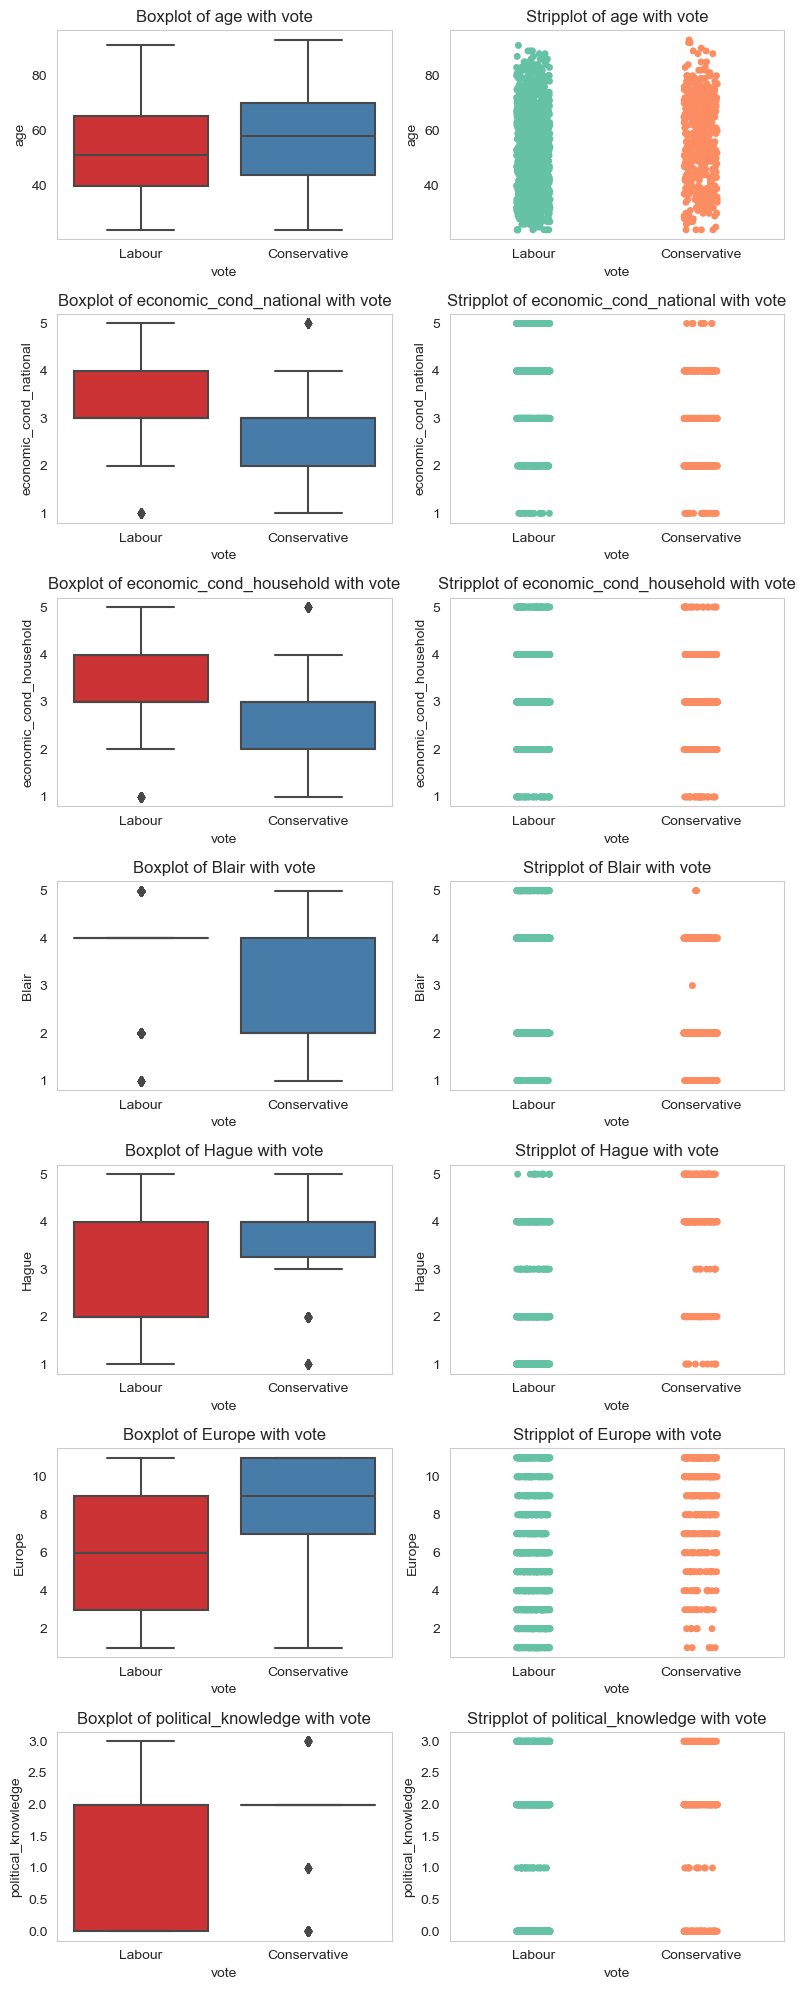

In [28]:
#Bivariate Analysis
#object variables
j=0
k=0
fig, axes = plt.subplots(nrows=7,ncols=2,squeeze=False)
fig.set_size_inches(8,20);
for i in data.columns[1:8]:
    sns.boxplot(x=data['vote'],y =data[i], ax=axes[j][0],palette ='Set1').set(title='Boxplot of {} with vote'.format(i));
    sns.stripplot(data["vote"], data[i], jitter=True,ax=axes[j][1],palette ='Set2').set(title='Stripplot of {} with vote'.format(i));
    j=j+1
plt.tight_layout();   
plt.show();

In [30]:
corr = data.corr()
corr

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic_cond_national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic_cond_household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political_knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


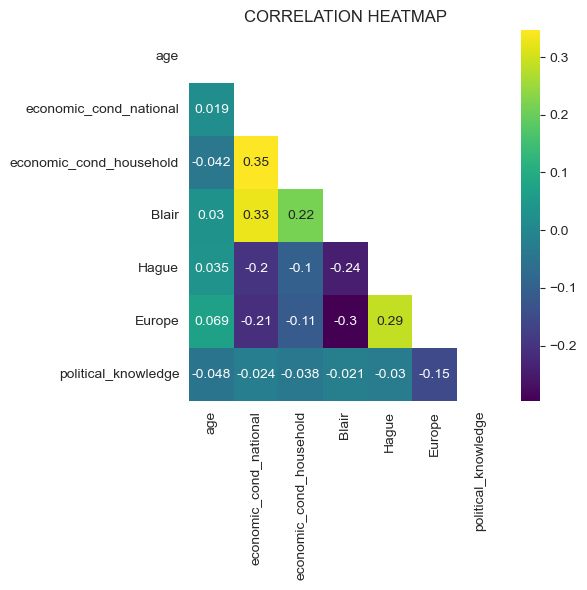

In [31]:
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap = 'viridis',mask = np.triu(corr)).set(title='CORRELATION HEATMAP')
plt.tight_layout()

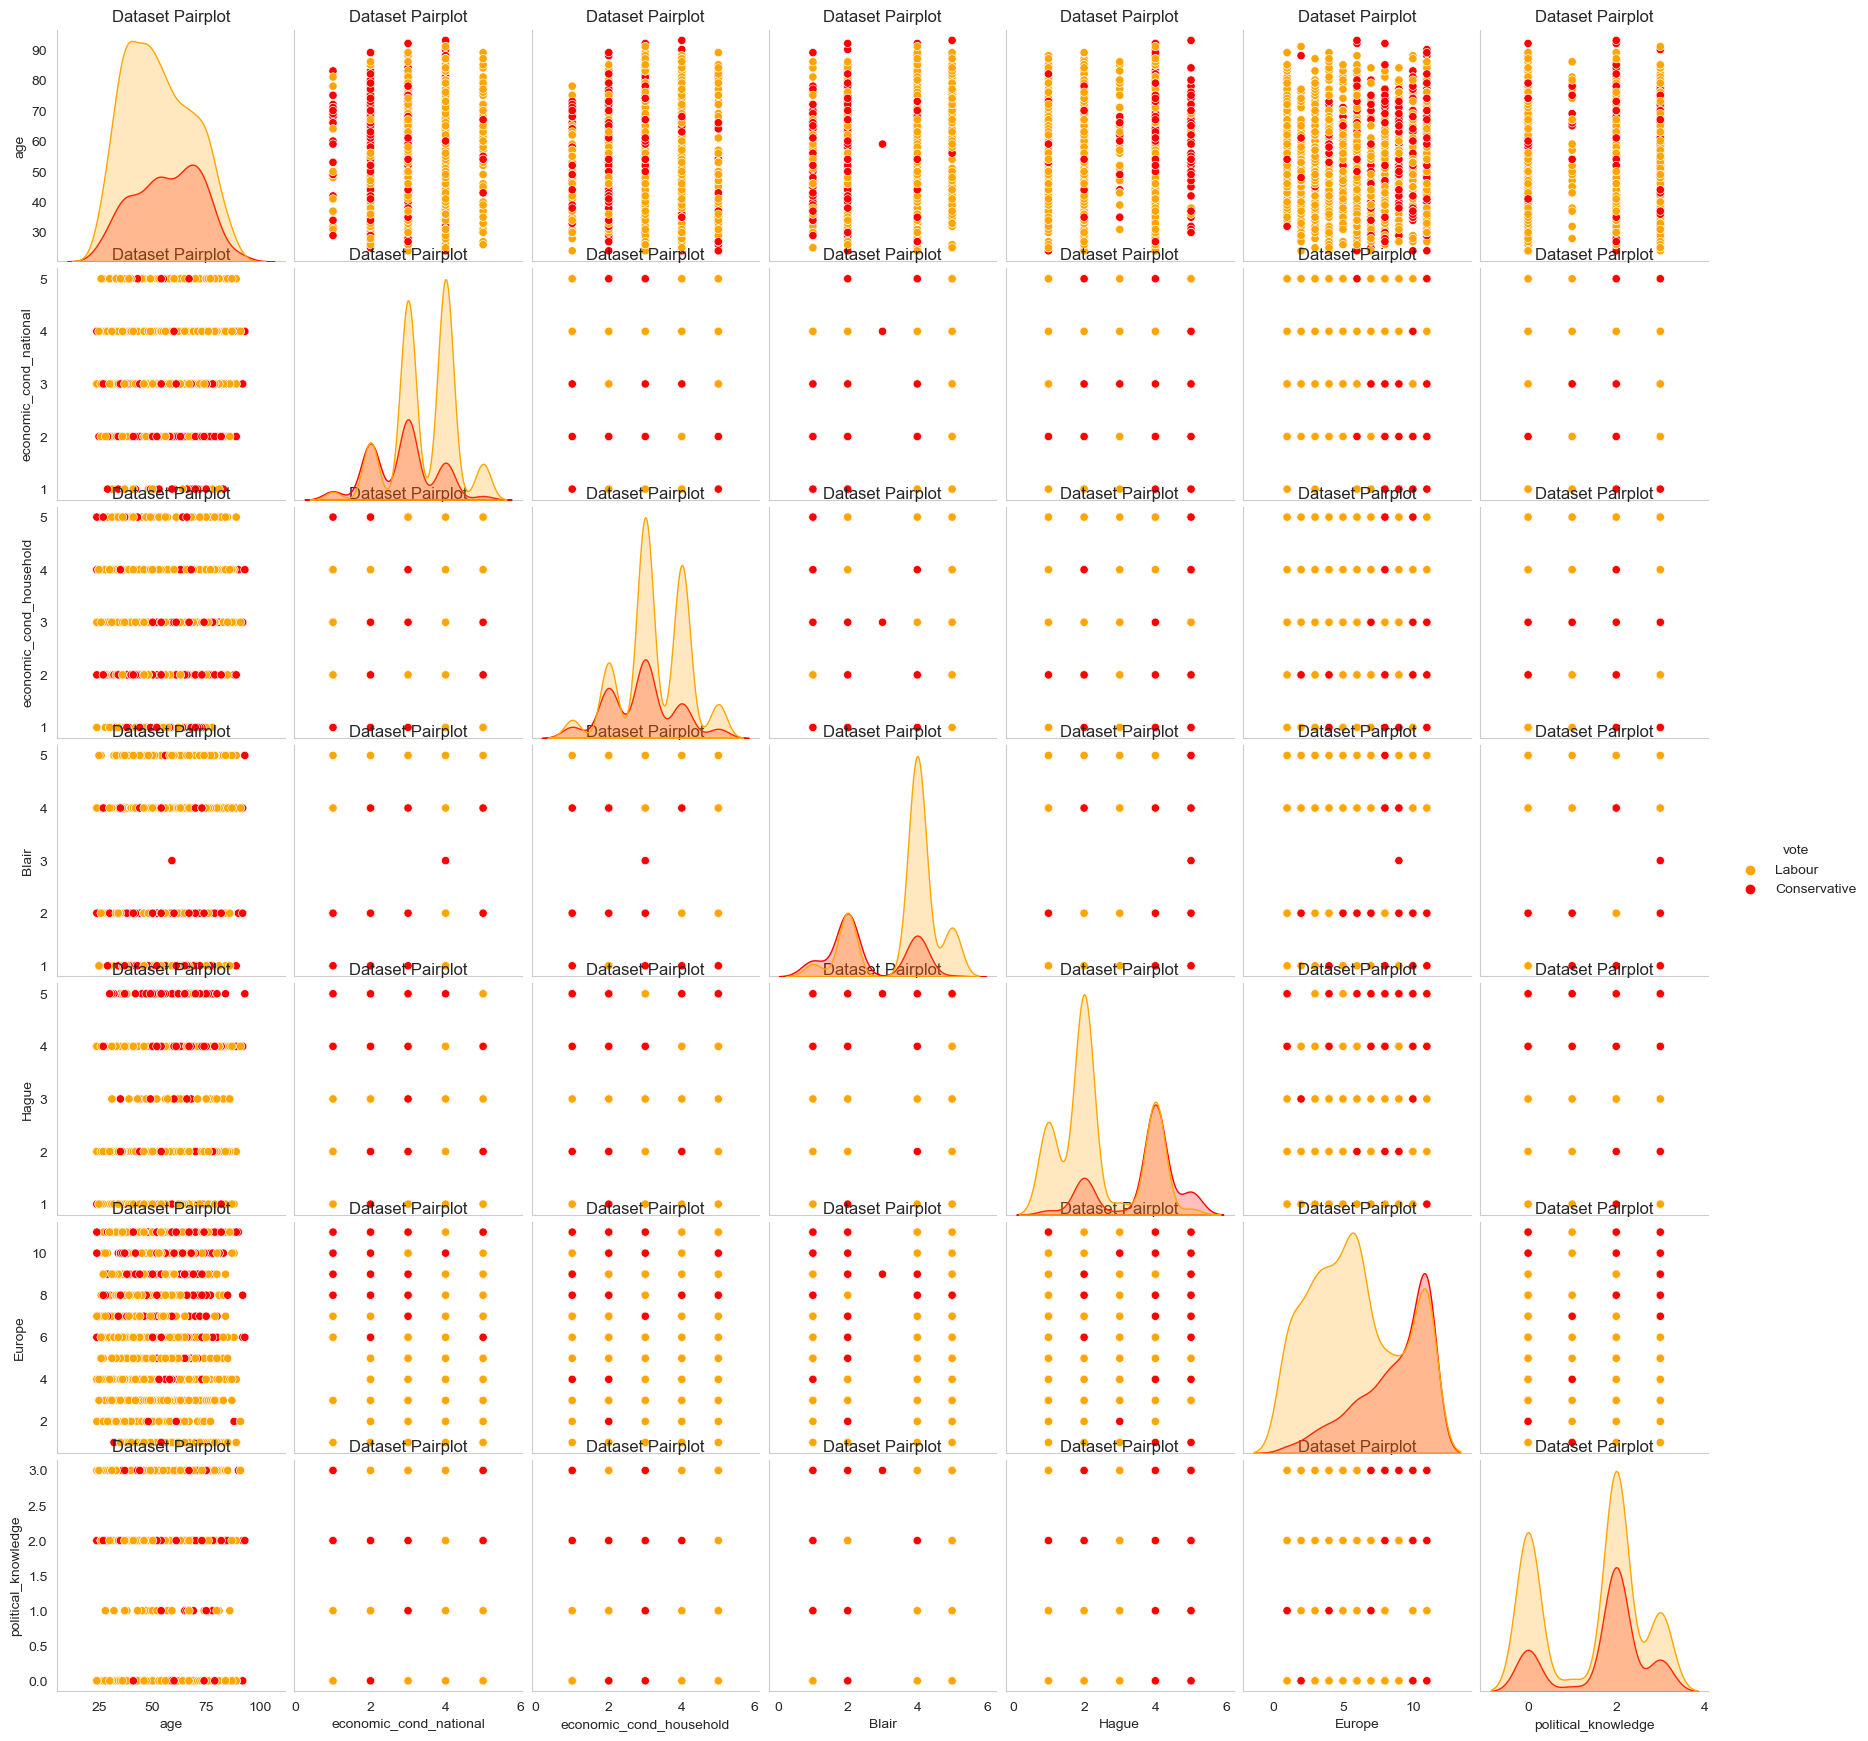

In [32]:
sns.pairplot(data,hue="vote",palette=['orange','red']).set(title='Dataset Pairplot');

## Outlier Check

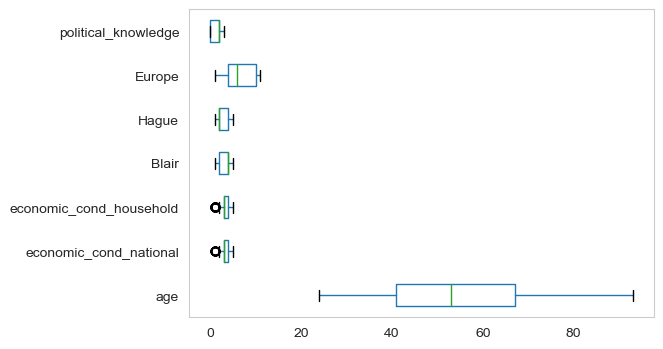

In [33]:
plt.figure(figsize = (6,4))
data.boxplot(vert=0);

## 1.3.	Data Preparation:
## Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).


In [34]:
data_1 = data.copy()

In [35]:
cat = ['vote', 'gender']

In [36]:
df =pd.get_dummies(data, columns=cat,drop_first=True)

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic_cond_national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic_cond_household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political_knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
vote_Labour,1525.0,0.697049,0.459685,0.0,0.0,1.0,1.0,1.0
gender_male,1525.0,0.467541,0.499109,0.0,0.0,0.0,1.0,1.0


In [38]:
model = df.rename(columns={'vote_Labour':'IsLabourOrNot' ,'gender_male':'IsMaleOrNot'})
model

,age,economic_cond_national,economic_cond_household,Blair,Hague,Europe,political_knowledge,IsLabourOrNot,IsMaleOrNot
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,0,1
1521,73,2,2,4,4,8,2,0,1
1522,37,3,3,5,4,2,2,1,1
1523,61,3,3,1,4,11,2,0,1


In [39]:
# Arrange data into independent variables and dependent variables
X = model.drop("IsLabourOrNot",axis=1) ## Features
y = model["IsLabourOrNot"] ## Target

In [40]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [41]:
print("Dimensions of the training and test data")
print('Post split, the training set for independent variables has {} rows and {} columns.'.format(X_train.shape[0],X_train.shape[1]))
print('Post split, the training set for dependent variables has {} rows and 1 columns.'.format(y_train.shape[0]))
print('Post split, the testing set for independent variables has {} rows and {} columns.'.format(X_test.shape[0],X_test.shape[1]))
print('Post split, the testing set for dependent variables has {} rows and 1 columns.'.format(y_test.shape[0]))
print("Total number of Observations are",1525)

Dimensions of the training and test data
Post split, the training set for independent variables has 1067 rows and 8 columns.
Post split, the training set for dependent variables has 1067 rows and 1 columns.
Post split, the testing set for independent variables has 458 rows and 8 columns.
Post split, the testing set for dependent variables has 458 rows and 1 columns.
Total number of Observations are 1525


## 1.4.	Modelling:
### Applying Logistic Regression and LDA (Linear Discriminant Analysis). 


In [42]:
model['IsLabourOrNot'].value_counts()

1    1063
0     462
Name: IsLabourOrNot, dtype: int64

In [43]:
y_train.value_counts(1)

1    0.688847
0    0.311153
Name: IsLabourOrNot, dtype: float64

In [44]:
y_test.value_counts(1)

1    0.716157
0    0.283843
Name: IsLabourOrNot, dtype: float64

In [45]:
#Logistic_model = LogisticRegression(solver='sag',max_iter=10000,penalty='none',verbose=True,tol = 0.0001,n_jobs= 2)
Logistic_model = LogisticRegression()
Logistic_model.fit(X_train, y_train)

LogisticRegression()

In [46]:
Logistic_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
ytrain_predict = Logistic_model.predict(X_train)
ytest_predict = Logistic_model.predict(X_test)

In [48]:
ytrain_predict_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
49,0.134470,0.865530
528,0.573402,0.426598
75,0.117127,0.882873
371,0.873763,0.126237
644,0.103637,0.896363


In [49]:
ytest_predict_prob = Logistic_model.predict_proba(X_train)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
146,0.044801,0.955199
30,0.261690,0.738310
341,0.066689,0.933311
793,0.083295,0.916705
762,0.634490,0.365510


In [50]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_data=pd.DataFrame(metrics).transpose()
   
    precision=round(met_data.loc["0"][0],2)
    recall=round(met_data.loc["0"][1],2)
    f1=round(met_data.loc["0"][2],2)
    return (met_data, accuracy,precision,recall,f1);

In [51]:
def performance_matrices_maj(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_data=pd.DataFrame(metrics).transpose()
 
    precision=round(met_data.loc["1"][0],2)
    recall=round(met_data.loc["1"][1],2)
    f1=round(met_data.loc["1"][2],2)
    return (met_data, accuracy,precision,recall,f1);

In [52]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(Logistic_model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(Logistic_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.69
logit_train_f1  0.73


In [53]:
print("Classification report of Train Data - Logistic Regression")
logit_train_met1

Classification report of Train Data - Logistic Regression


,precision,recall,f1-score,support
0,0.771044,0.689759,0.728140,332.000000
1,0.866234,0.907483,0.886379,735.000000
accuracy,0.839738,0.839738,0.839738,0.839738
macro avg,0.818639,0.798621,0.807259,1067.000000
weighted avg,0.836615,0.839738,0.837142,1067.000000


In [54]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(Logistic_model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(Logistic_model, X_test, y_test,ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.65
logit_test_f1  0.68


In [55]:
print("Classification report of Test Data - Logistic Regression")
logit_test_met1

Classification report of Test Data - Logistic Regression


,precision,recall,f1-score,support
0,0.702479,0.653846,0.677291,130.000000
1,0.866469,0.890244,0.878195,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.784474,0.772045,0.777743,458.000000
weighted avg,0.819922,0.823144,0.821170,458.000000


In [56]:
model_score=Logistic_model.score(X_train,y_train)
print(model_score)

print(' ')
print('Claissification Report (Logistic Regression - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.8397375820056232
 
Claissification Report (Logistic Regression - Train data)
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [57]:
model_score=Logistic_model.score(X_test,y_test)
print(model_score)

print(' ')
print ('Classification Report (Logistic Regression - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8231441048034934
 
Classification Report (Logistic Regression - Test data)
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



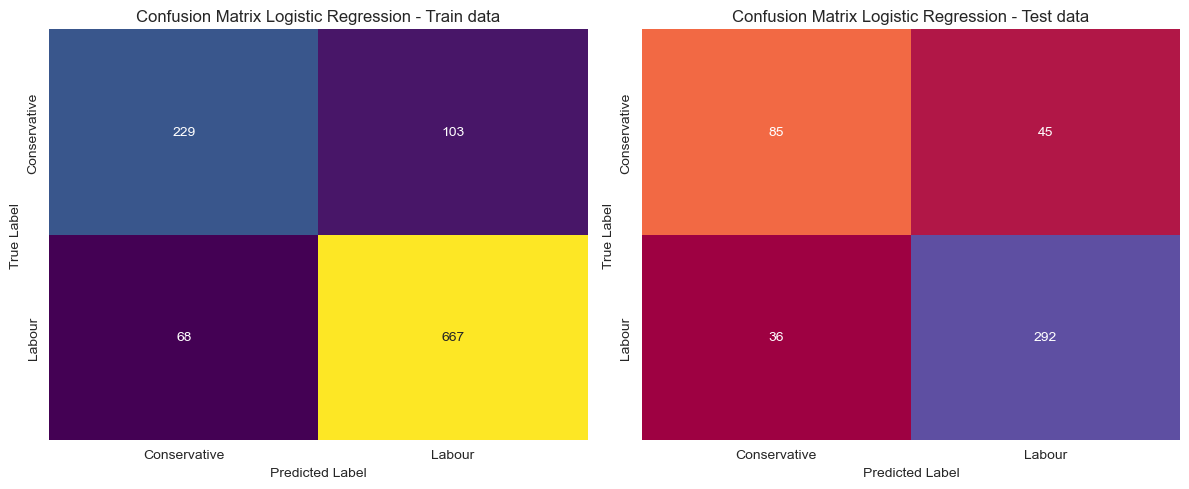

In [58]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Logistic Regression - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Logistic Regression - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.889
AUC for the Test Data: 0.882


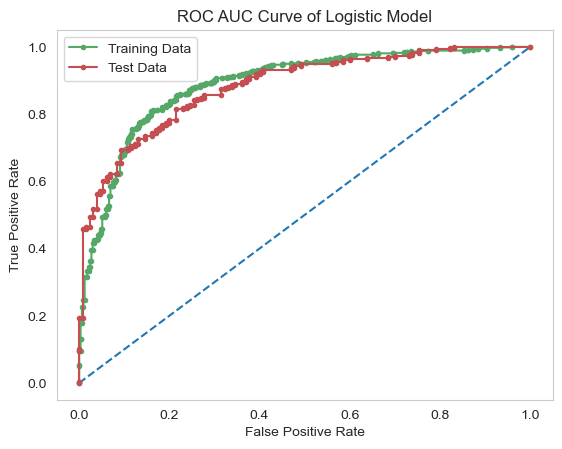

In [59]:
# AUC and ROC for the training data

# calculate AUC
probs = Logistic_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
logit_train_auc=round(auc,2)
logit_train_maj_auc=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = Logistic_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
logit_test_auc=round(auc,2)
logit_test_maj_auc=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of Logistic Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show();

### Linear Discriminant Analysis

In [60]:
model_1 = LinearDiscriminantAnalysis()
LDA_model=model_1.fit(X_train,y_train)

In [61]:
LDA_model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [62]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [63]:
ytrain_predict_prob=LDA_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
516,0.072321,0.927679
56,0.091774,0.908226
391,0.514171,0.485829
119,0.085301,0.914699
160,0.017718,0.982282


In [64]:
ytest_predict_prob=LDA_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
356,0.470005,0.529995
236,0.890515,0.109485
434,0.055781,0.944219
268,0.901855,0.098145
161,0.040547,0.959453


In [65]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.84
LDA_train_precision  0.76
LDA_train_recall  0.7
LDA_train_f1  0.73


In [66]:
print("Classification report of Train Data - LDA")
LDA_train_met1

Classification report of Train Data - LDA


,precision,recall,f1-score,support
0,0.756494,0.701807,0.728125,332.000000
1,0.869565,0.897959,0.883534,735.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.813029,0.799883,0.805830,1067.000000
weighted avg,0.834383,0.836926,0.835178,1067.000000


In [67]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.82
LDA_test_precision  0.69
LDA_test_recall  0.66
LDA_test_f1  0.67


In [68]:
print("Classification report of Test Data - LDA")
LDA_test_met1

Classification report of Test Data - LDA


,precision,recall,f1-score,support
0,0.688000,0.661538,0.674510,130.000000
1,0.867868,0.881098,0.874433,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.777934,0.771318,0.774471,458.000000
weighted avg,0.816814,0.818777,0.817686,458.000000


In [69]:
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

print(' ')
print('Classification Report (LDA - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.8369259606373008
 
Classification Report (LDA - Train data)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [70]:
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)

print(' ')
print('Classification Report (LDA - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8187772925764192
 
Classification Report (LDA - Test data)
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



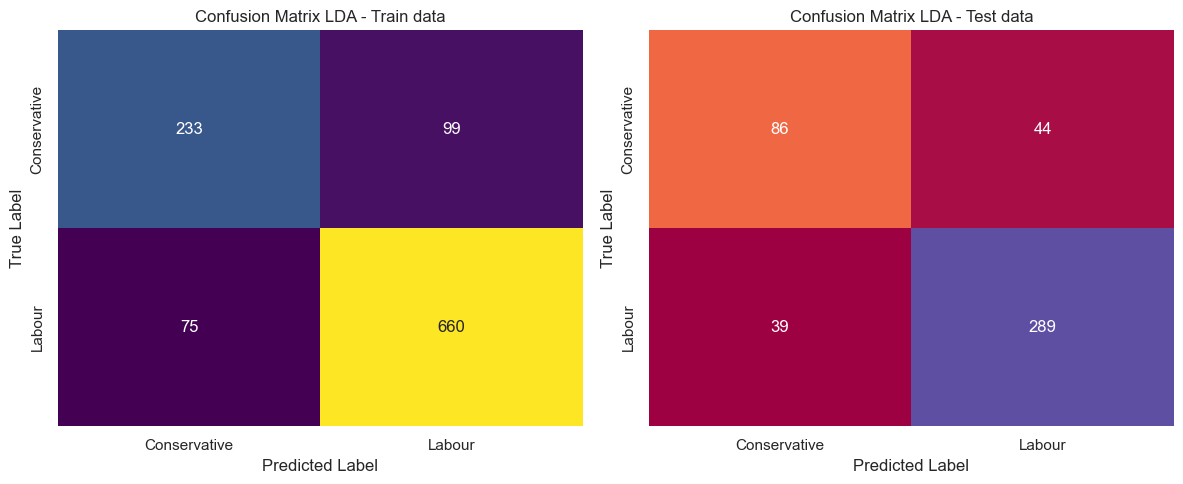

In [71]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix LDA - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix LDA - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


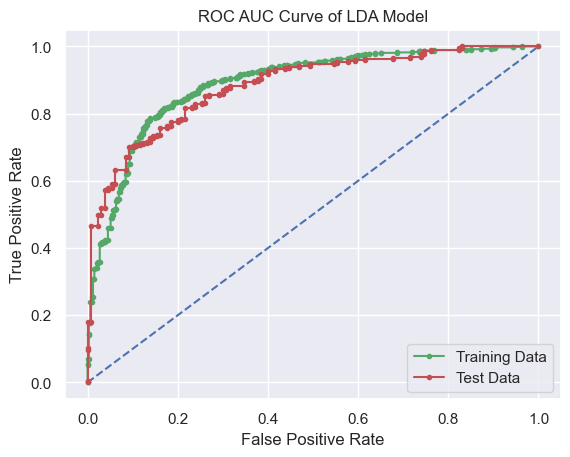

In [72]:
# calculate AUC
probs = LDA_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
LDA_train_auc=round(auc,2)
LDA_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = LDA_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
LDA_test_auc=round(auc,2)
LDA_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of LDA Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show();

## 1.5.	Apply KNN Model and Naïve Bayes Model. Interpret the results

### Gaussian Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)

GaussianNB()

In [74]:
GNB_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [75]:
ytrain_predict = GNB_model.predict(X_train)
ytest_predict = GNB_model.predict(X_test)

In [76]:
ytrain_predict_prob=GNB_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
1034,0.976017,0.023983
913,0.977269,0.022731
764,0.002533,0.997467
247,0.481462,0.518538
25,0.002515,0.997485


In [77]:
ytest_predict_prob=GNB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
218,0.304602,0.695398
327,0.832825,0.167175
378,0.004193,0.995807
444,0.981228,0.018772
381,0.816449,0.183551


In [78]:
GNB_train_met1,GNB_train_accu,GNB_train_precision,GNB_train_recall,GNB_train_f1 = performance_matrices(GNB_model, X_train, y_train, ytrain_predict)
GNB_train_met_maj1,GNB_train_accu_maj,GNB_train_precision_maj,GNB_train_recall_maj,GNB_train_f1_maj = performance_matrices_maj(GNB_model, X_train, y_train, ytrain_predict)
print ('GNB_train_accu ',GNB_train_accu)
print ('GNB_train_precision ',GNB_train_precision)
print ('GNB_train_recall ',GNB_train_recall)
print ('GNB_train_f1 ',GNB_train_f1)

GNB_train_accu  0.83
GNB_train_precision  0.74
GNB_train_recall  0.72
GNB_train_f1  0.73


In [79]:
print("Classification report of Train Data - Gaussian Naive Bayes")
GNB_train_met1

Classification report of Train Data - Gaussian Naive Bayes


,precision,recall,f1-score,support
0,0.736196,0.722892,0.729483,332.000000
1,0.875843,0.882993,0.879404,735.000000
accuracy,0.833177,0.833177,0.833177,0.833177
macro avg,0.806020,0.802942,0.804444,1067.000000
weighted avg,0.832392,0.833177,0.832756,1067.000000


In [80]:
GNB_test_met1,GNB_test_accu,GNB_test_precision,GNB_test_recall,GNB_test_f1 = performance_matrices(GNB_model, X_test, y_test, ytest_predict)
GNB_test_met_maj1,GNB_test_accu_maj,GNB_test_precision_maj,GNB_test_recall_maj,GNB_test_f1_maj = performance_matrices_maj(GNB_model, X_test, y_test, ytest_predict)
print ('GNB_test_accu ',GNB_test_accu)
print ('GNB_test_precision ',GNB_test_precision)
print ('GNB_test_recall ',GNB_test_recall)
print ('GNB_test_f1 ',GNB_test_f1)

GNB_test_accu  0.83
GNB_test_precision  0.68
GNB_test_recall  0.72
GNB_test_f1  0.7


In [81]:
print("Classification report of Test Data - Gaussian Naive Bayes")
GNB_test_met1

Classification report of Test Data - Gaussian Naive Bayes


,precision,recall,f1-score,support
0,0.681159,0.723077,0.701493,130.000000
1,0.887500,0.865854,0.876543,328.000000
accuracy,0.825328,0.825328,0.825328,0.825328
macro avg,0.784330,0.794465,0.789018,458.000000
weighted avg,0.828932,0.825328,0.826856,458.000000


In [82]:
model_score = GNB_model.score(X_train, y_train)                     
print(model_score)

print(' ')
print("Classification report (Gaussian Naive Bayes - Train data)")
print(metrics.classification_report(y_train, ytrain_predict))

0.8331771321462043
 
Classification report (Gaussian Naive Bayes - Train data)
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [83]:
## Performance Matrix on test data set
model_score = GNB_model.score(X_test, y_test)                    
print(model_score)

print(' ')
print("Classification report (Gaussian Naive Bayes - Test data)")
print(metrics.classification_report(y_test, ytest_predict))

0.8253275109170306
 
Classification report (Gaussian Naive Bayes - Test data)
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



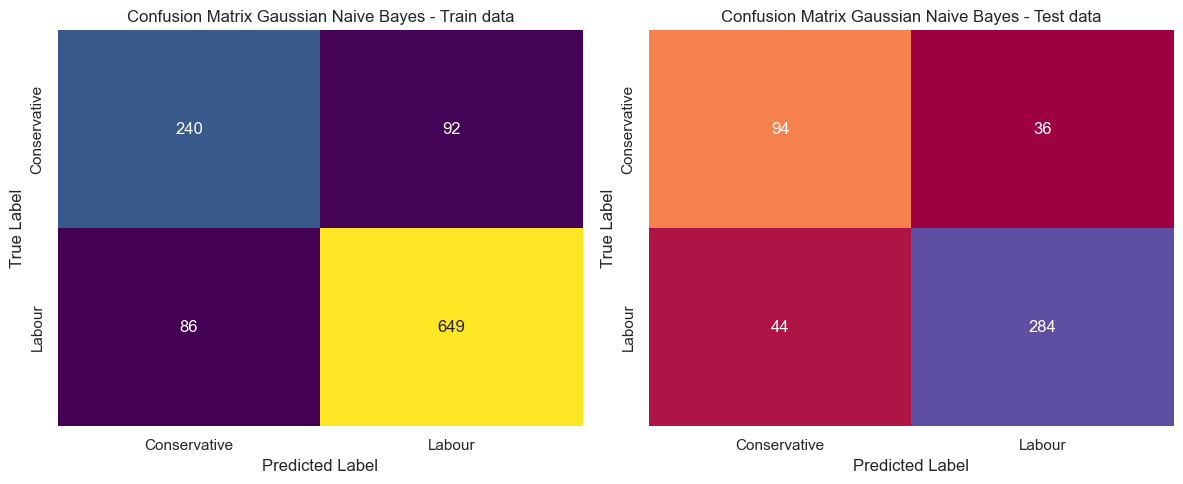

In [84]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Gaussian Naive Bayes - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Gaussian Naive Bayes - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.886
AUC for the Test Data: 0.885


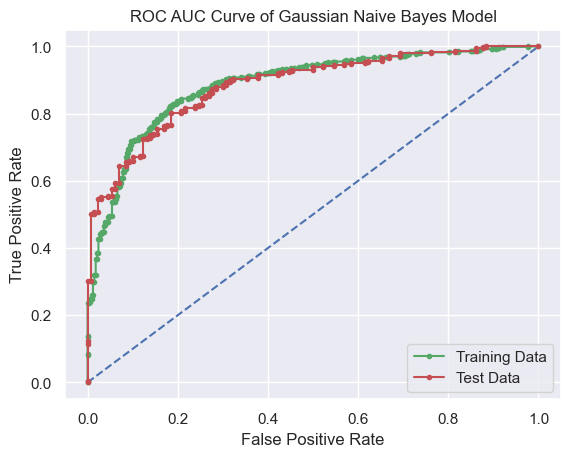

In [85]:
# calculate AUC
probs = GNB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
GNB_train_auc=round(auc,2)
GNB_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = GNB_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
GNB_test_auc=round(auc,2)
GNB_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.legend(loc='best')
plt.title('ROC AUC Curve of Gaussian Naive Bayes Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show();

### Multinomial Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [87]:
MNB_model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

In [88]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [89]:
ytrain_predict_prob=MNB_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
265,0.084110,0.915890
957,0.243563,0.756437
509,0.061646,0.938354
835,0.775880,0.224120
274,0.049698,0.950302


In [90]:
ytest_predict_prob=MNB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
311,0.031228,0.968772
154,0.008001,0.991999
363,0.773461,0.226539
298,0.076414,0.923586
372,0.599865,0.400135


In [91]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.81
MNB_train_precision  0.71
MNB_train_recall  0.63
MNB_train_f1  0.67


In [92]:
print("Classification report of Train Data - Multinomial Naive Bayes")
MNB_train_met1

Classification report of Train Data - Multinomial Naive Bayes


,precision,recall,f1-score,support
0,0.714777,0.626506,0.667737,332.000000
1,0.840206,0.887075,0.863005,735.000000
accuracy,0.805998,0.805998,0.805998,0.805998
macro avg,0.777491,0.756790,0.765371,1067.000000
weighted avg,0.801178,0.805998,0.802246,1067.000000


In [93]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.81
MNB_test_precision  0.67
MNB_test_recall  0.66
MNB_test_f1  0.67


In [94]:
print("Classification report of Test Data - Multinomial Naive Bayes")
MNB_test_met1

Classification report of Test Data - Multinomial Naive Bayes


,precision,recall,f1-score,support
0,0.671875,0.661538,0.666667,130.000000
1,0.866667,0.871951,0.869301,328.000000
accuracy,0.812227,0.812227,0.812227,0.812227
macro avg,0.769271,0.766745,0.767984,458.000000
weighted avg,0.811376,0.812227,0.811785,458.000000


In [95]:
## Performance Matrix on train data set
model_score = MNB_model.score(X_train, y_train)                    
print(model_score)
         
print(' ')
print("Classification report (Multinomial Naive Bayes - Train data)")
print(metrics.classification_report(y_train, ytrain_predict))  

0.8059981255857545
 
Classification report (Multinomial Naive Bayes - Train data)
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       332
           1       0.84      0.89      0.86       735

    accuracy                           0.81      1067
   macro avg       0.78      0.76      0.77      1067
weighted avg       0.80      0.81      0.80      1067



In [96]:
## Performance Matrix on test data set
model_score = MNB_model.score(X_test, y_test)                    
print(model_score)

print(' ')
print("Classification report (Multinomial Naive Bayes - Test data)")
print(metrics.classification_report(y_test, ytest_predict))  

0.8122270742358079
 
Classification report (Multinomial Naive Bayes - Test data)
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       130
           1       0.87      0.87      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.77      0.77       458
weighted avg       0.81      0.81      0.81       458



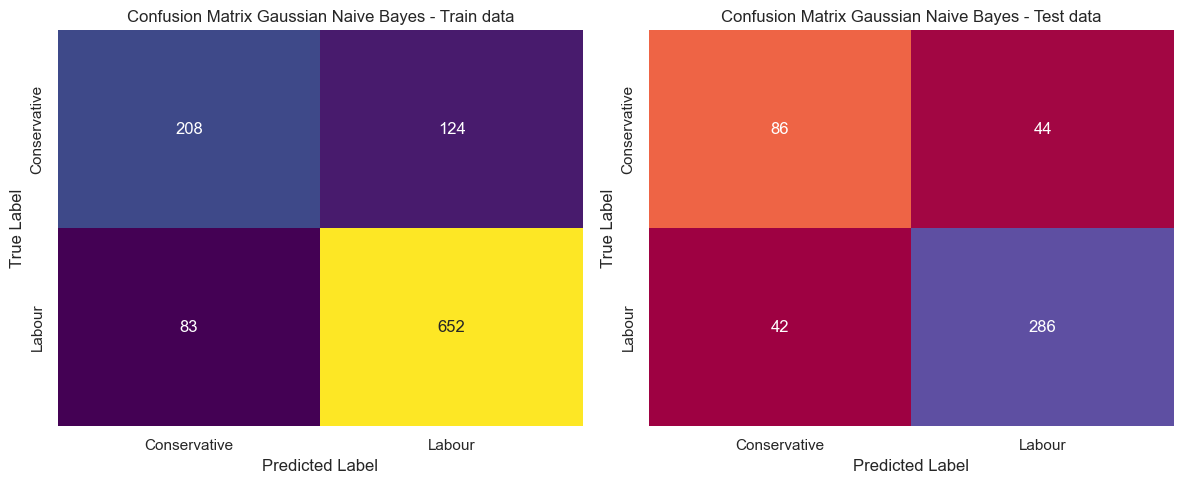

In [97]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Gaussian Naive Bayes - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Gaussian Naive Bayes - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.856
AUC for the Test Data: 0.852


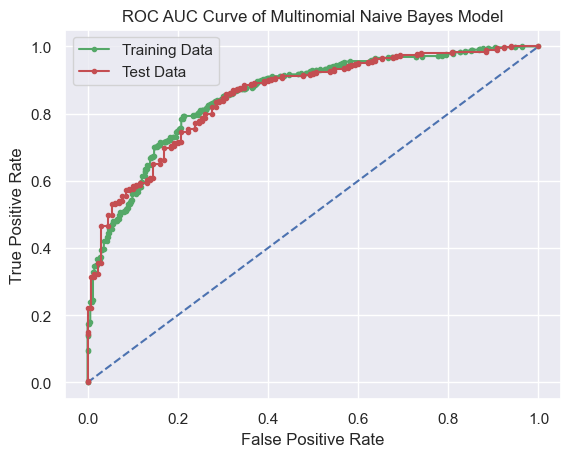

In [98]:
# calculate AUC
probs = MNB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
MNB_train_auc=round(auc,2)
MNB_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = MNB_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
MNB_test_auc=round(auc,2)
MNB_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.legend(loc='best')
plt.title('ROC AUC Curve of Multinomial Naive Bayes Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show();

### KNN

In [99]:
X1=model.drop('IsLabourOrNot',axis=1)
y1=model['IsLabourOrNot']

In [100]:
# zscore
X1[['age',' economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']]= X1[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']].apply(zscore)

In [101]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, test_size=0.30,random_state=1)

In [102]:
print("Dimensions of the training and test data")
print('After the split, the training set for independent variables has {} rows and {} columns.'.format(X_train.shape[0],X_train.shape[1]))
print('After the split, the training set for dependent variables has {} rows and 1 columns.'.format(y_train.shape[0]))
print('After the split, the testing set for independent variables has {} rows and {} columns.'.format(X_test.shape[0],X_test.shape[1]))
print('After the split, the testing set for dependent variables has {} rows and 1 columns.'.format(y_test.shape[0]))
print("Total number of Observations are",1525)

Dimensions of the training and test data
After the split, the training set for independent variables has 1067 rows and 8 columns.
After the split, the training set for dependent variables has 1067 rows and 1 columns.
After the split, the testing set for independent variables has 458 rows and 8 columns.
After the split, the testing set for dependent variables has 458 rows and 1 columns.
Total number of Observations are 1525


In [103]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train1,y_train1)

KNeighborsClassifier()

In [104]:
KNN_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [105]:
ytrain_predict = KNN_model.predict(X_train1)
ytest_predict = KNN_model.predict(X_test1)

In [106]:
ytrain_predict_prob=KNN_model.predict_proba(X_train1)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
692,0.0,1.0
222,0.0,1.0
440,0.0,1.0
741,0.6,0.4
996,0.0,1.0


In [107]:
ytest_predict_prob=KNN_model.predict_proba(X_test1)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
205,0.2,0.8
341,0.2,0.8
113,0.0,1.0
457,0.2,0.8
140,0.6,0.4


In [108]:
## Performance Matrix on train data set
model_score = KNN_model.score(X_train1, y_train1)
print(model_score)

print(' ')
print("Classification report (KNN with no params - Train data)")
print(metrics.classification_report(y_train1, ytrain_predict))

0.865979381443299
 
Classification report (KNN with no params - Train data)
              precision    recall  f1-score   support

           0       0.81      0.74      0.78       332
           1       0.89      0.92      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.83      0.84      1067
weighted avg       0.86      0.87      0.86      1067



In [109]:
## Performance Matrix on test data set
model_score = KNN_model.score(X_test1, y_test1)
print(model_score)

print(' ')
print("Classification report (KNN with no params - Test data)")
print(metrics.classification_report(y_test1, ytest_predict))

0.8406113537117904
 
Classification report (KNN with no params - Test data)
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       130
           1       0.89      0.89      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



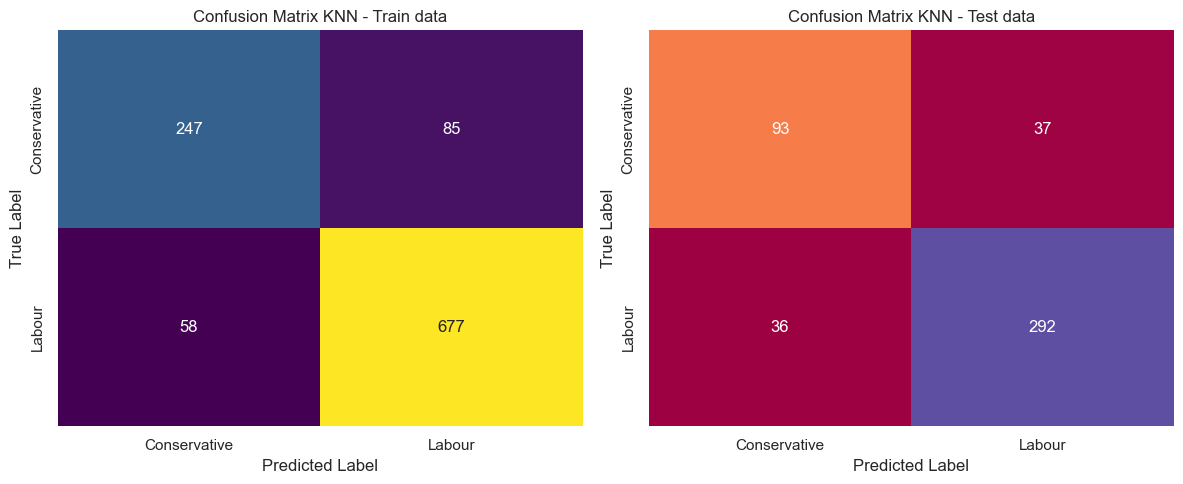

In [110]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix KNN - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix KNN - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.932
AUC for the Test Data: 0.875


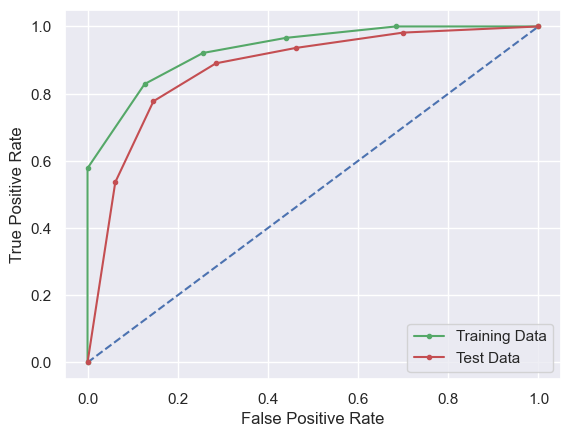

In [111]:
# calculate AUC
probs = KNN_model.predict_proba(X_train1)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train1,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = KNN_model.predict_proba(X_test1)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test1,probs1)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show();

In [112]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train1, y_train1)
    # evaluate test accuracy
    scores = knn.score(X_test1, y_test1)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.21615720524017468,
 0.16812227074235808,
 0.1593886462882096,
 0.17248908296943233,
 0.16157205240174677,
 0.16812227074235808,
 0.17030567685589515,
 0.17030567685589515,
 0.18122270742358082,
 0.1834061135371179]

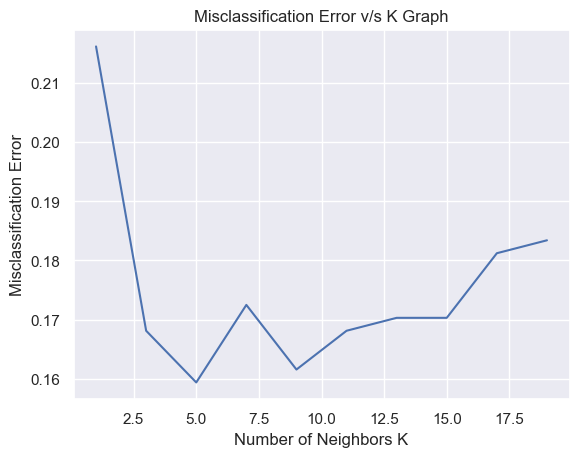

In [113]:
import matplotlib.pyplot as plt

plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error v/s K Graph')
plt.show();

In [114]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model1=KNeighborsClassifier(n_neighbors=9)
KNN_model1.fit(X_train1,y_train1)

KNeighborsClassifier(n_neighbors=9)

In [115]:
ytrain_predict = KNN_model1.predict(X_train1)
ytest_predict = KNN_model1.predict(X_test1)

In [116]:
ytrain_predict_prob=KNN_model1.predict_proba(X_train1)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
165,0.111111,0.888889
60,0.444444,0.555556
524,0.000000,1.000000
171,0.555556,0.444444
57,0.444444,0.555556


In [117]:
ytest_predict_prob=KNN_model1.predict_proba(X_test1)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
323,0.000000,1.000000
360,0.111111,0.888889
219,0.111111,0.888889
47,0.222222,0.777778
33,0.222222,0.777778


In [118]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model1, X_train1, y_train1, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model1, X_train1, y_train1, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.85
KNN_train_precision  0.79
KNN_train_recall  0.7
KNN_train_f1  0.74


In [119]:
print("Classification report of Train Data - KNN model with n_neighbors")
KNN_train_met1

Classification report of Train Data - KNN model with n_neighbors


,precision,recall,f1-score,support
0,0.789831,0.701807,0.743222,332.00000
1,0.871762,0.915646,0.893165,735.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.830796,0.808727,0.818193,1067.00000
weighted avg,0.846269,0.849110,0.846510,1067.00000


In [120]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model1, X_test1, y_test1, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model1, X_test1, y_test1, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.84
KNN_test_precision  0.73
KNN_test_recall  0.68
KNN_test_f1  0.71


In [121]:
print("Classification report of Test Data - KNN model with n_neighbors")
KNN_test_met1

Classification report of Test Data - KNN model with n_neighbors


,precision,recall,f1-score,support
0,0.729508,0.684615,0.706349,130.000000
1,0.877976,0.899390,0.888554,328.000000
accuracy,0.838428,0.838428,0.838428,0.838428
macro avg,0.803742,0.792003,0.797452,458.000000
weighted avg,0.835835,0.838428,0.836837,458.000000


In [122]:
## Performance Matrix on train data set
model_score = KNN_model1.score(X_train1, y_train1)
print(model_score)

print(' ')
print("Classification report (KNN with n_nrighbors - Train data)")
print(metrics.classification_report(y_train1, ytrain_predict))

0.8491096532333646
 
Classification report (KNN with n_nrighbors - Train data)
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       332
           1       0.87      0.92      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



In [123]:
## Performance Matrix on test data set
model_score = KNN_model1.score(X_test1, y_test1)
print(model_score)

print(' ')
print("Classification report (KNN with n_nrighbors - Test data)")
print(metrics.classification_report(y_test1, ytest_predict))

0.8384279475982532
 
Classification report (KNN with n_nrighbors - Test data)
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       130
           1       0.88      0.90      0.89       328

    accuracy                           0.84       458
   macro avg       0.80      0.79      0.80       458
weighted avg       0.84      0.84      0.84       458



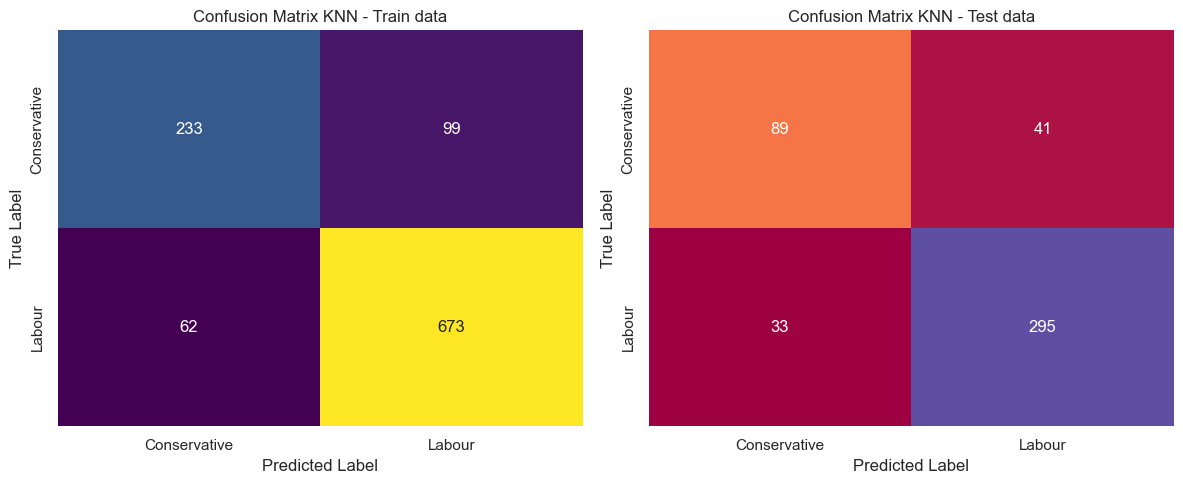

In [124]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix KNN - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix KNN - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.932
AUC for the Test Data: 0.875


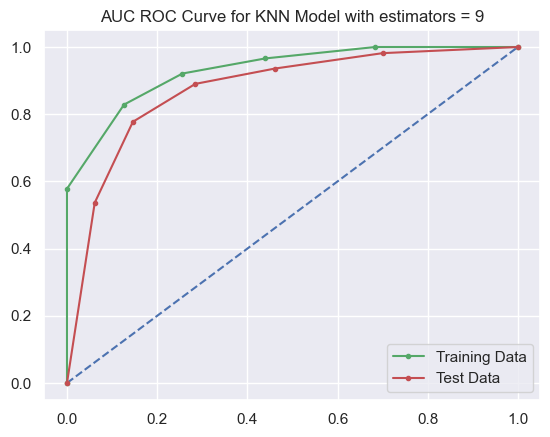

In [125]:
# calculate AUC
probs = KNN_model.predict_proba(X_train1)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train1,probs)
KNN_train_auc=round(auc,2)
KNN_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train1,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = KNN_model.predict_proba(X_test1)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test1,probs1)
KNN_test_auc=round(auc,2)
KNN_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test1,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('AUC ROC Curve for KNN Model with estimators = 9')
plt.legend(loc='best')
plt.show();

## 1.6.	Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

### Gradient Boosting

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
GB_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [127]:
GB_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [128]:
ytrain_predict = GB_model.predict(X_train)
ytest_predict = GB_model.predict(X_test)

In [129]:
ytrain_predict_prob=GB_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5).round(2)

,0,1
774,0.0,1.0
291,0.0,1.0
446,0.0,1.0
334,1.0,0.0
651,0.0,1.0


In [130]:
ytest_predict_prob=GB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5).round(2)

,0,1
53,0.0,1.0
83,0.0,1.0
393,1.0,0.0
194,0.0,1.0
456,0.0,1.0


In [131]:
GB_met_train1,GB_train_accu,GB_train_precision,GB_train_recall,GB_train_f1 = performance_matrices(GB_model, X_train, y_train, ytrain_predict)
GB_met_train_maj1,GB_train_accu_maj,GB_train_precision_maj,GB_train_recall_maj,GB_train_f1_maj = performance_matrices_maj(GB_model, X_train, y_train, ytrain_predict)
print ('GB_train_accu ',GB_train_accu)
print ('GB_train_precision ',GB_train_precision)
print ('GB_train_recall ',GB_train_recall)
print ('GB_train_f1 ',GB_train_f1)

GB_train_accu  1.0
GB_train_precision  1.0
GB_train_recall  1.0
GB_train_f1  1.0


In [132]:
print('Classification Report of Train data - Gradient Boosting')
GB_met_train1

Classification Report of Train data - Gradient Boosting


,precision,recall,f1-score,support
0,1.000000,0.996988,0.998492,332.000000
1,0.998641,1.000000,0.999320,735.000000
accuracy,0.999063,0.999063,0.999063,0.999063
macro avg,0.999321,0.998494,0.998906,1067.000000
weighted avg,0.999064,0.999063,0.999062,1067.000000


In [133]:
GB_met_test1,GB_test_accu,GB_test_precision,GB_test_recall,GB_test_f1 = performance_matrices(GB_model, X_test, y_test, ytest_predict)
GB_met_test_maj1,GB_test_accu_maj,GB_test_precision_maj,GB_test_recall_maj,GB_test_f1_maj = performance_matrices_maj(GB_model, X_test, y_test, ytest_predict)
print ('GB_test_accu ',GB_test_accu)
print ('GB_test_precision ',GB_test_precision)
print ('GB_test_recall ',GB_test_recall)
print ('GB_test_f1 ',GB_test_f1)

GB_test_accu  0.79
GB_test_precision  0.62
GB_test_recall  0.69
GB_test_f1  0.66


In [134]:
print('Classification Report of Test data - Gradient Boosting')
GB_met_test1

Classification Report of Test data - Gradient Boosting


,precision,recall,f1-score,support
0,0.625000,0.692308,0.656934,130.00000
1,0.872611,0.835366,0.853583,328.00000
accuracy,0.794760,0.794760,0.794760,0.79476
macro avg,0.748806,0.763837,0.755258,458.00000
weighted avg,0.802329,0.794760,0.797765,458.00000


In [135]:
model_score = GB_model.score(X_train, y_train)                     
print(model_score)

print(" ")
print ('Classification Report (Gradeint Boosting - Train data)')
print(metrics.classification_report(y_train, ytrain_predict))   

0.9990627928772259
 
Classification Report (Gradeint Boosting - Train data)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [136]:
model_score=GB_model.score(X_test,y_test)
print(model_score)

print(' ')
print('Classification Report (Gradient Boosting - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.7947598253275109
 
Classification Report (Gradient Boosting - Test data)
              precision    recall  f1-score   support

           0       0.62      0.69      0.66       130
           1       0.87      0.84      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.76      0.76       458
weighted avg       0.80      0.79      0.80       458



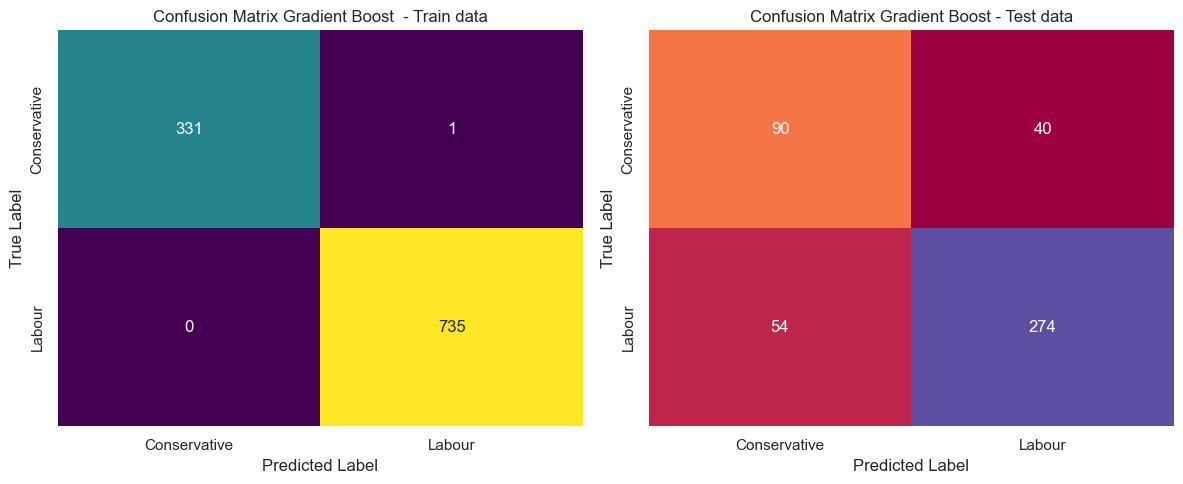

In [137]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Gradient Boost  - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Gradient Boost - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 1.000
AUC for the Test Data: 0.853


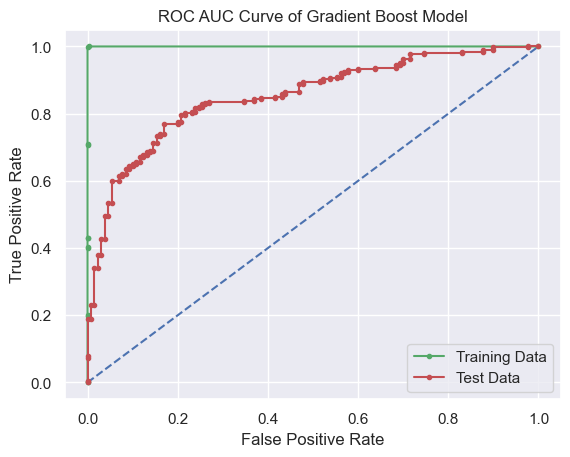

In [138]:
# AUC and ROC for the training data

# calculate AUC
probs = GB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
GB_train_auc=round(auc,2)
GB_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = GB_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
GB_test_auc=round(auc,2)
GB_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',co lor ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of Gradient Boost Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

### ADA Boosting

In [139]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1) 
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [140]:
ADB_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 1}

In [141]:
ytrain_predict = ADB_model.predict(X_train)
ytest_predict = ADB_model.predict(X_test)

In [142]:
ytrain_predict_prob=ADB_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5).round(2)

,0,1
83,0.50,0.50
391,0.50,0.50
223,0.51,0.49
207,0.49,0.51
386,0.49,0.51


In [143]:
ytest_predict_prob=ADB_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5).round(2)

,0,1
150,0.49,0.51
398,0.50,0.50
430,0.49,0.51
79,0.50,0.50
324,0.49,0.51


In [144]:
ADB_met_train1,ADB_train_accu,ADB_train_precision,ADB_train_recall,ADB_train_f1 = performance_matrices(ADB_model, X_train, y_train, ytrain_predict)
ADB_met_train_maj,ADB_train_accu_maj,ADB_train_precision_maj,ADB_train_recall_maj,ADB_train_f1_maj = performance_matrices_maj(ADB_model, X_train, y_train, ytrain_predict)
print ('ADB_train_accu ',ADB_train_accu)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_train_accu  0.85
ADB_train_precision  0.78
ADB_train_recall  0.72
ADB_train_f1  0.74


In [145]:
print('Classification Report of Train data - Ada Boost')
ADB_met_train1

Classification Report of Train data - Ada Boost


,precision,recall,f1-score,support
0,0.775244,0.716867,0.744914,332.000000
1,0.876316,0.906122,0.890970,735.000000
accuracy,0.847235,0.847235,0.847235,0.847235
macro avg,0.825780,0.811495,0.817942,1067.000000
weighted avg,0.844867,0.847235,0.845524,1067.000000


In [146]:
ADB_met_test1,ADB_test_accu,ADB_test_precision,ADB_test_recall,ADB_test_f1 = performance_matrices(ADB_model, X_test, y_test, ytest_predict)
ADB_met_test_maj1,ADB_test_accu_maj,ADB_test_precision_maj,ADB_test_recall_maj,ADB_test_f1_maj = performance_matrices_maj(ADB_model, X_test, y_test, ytest_predict)
print ('ADB_test_accu ',ADB_test_accu)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_test_accu  0.82
ADB_test_precision  0.68
ADB_test_recall  0.69
ADB_test_f1  0.68


In [147]:
print('Classification Report of Test data - Ada Boost')
ADB_met_test1

Classification Report of Test data - Ada Boost


,precision,recall,f1-score,support
0,0.676692,0.692308,0.684411,130.000000
1,0.876923,0.868902,0.872894,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.776807,0.780605,0.778652,458.000000
weighted avg,0.820089,0.818777,0.819395,458.000000


In [148]:
model_score=ADB_model.score(X_train,y_train)
print(model_score)

print(' ')
print('Classification Report (ADA Boost - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.8472352389878163
 
Classification Report (ADA Boost - Train data)
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [149]:
model_score=ADB_model.score(X_test,y_test)
print(model_score)

print(' ')
print('Classification Report (ADA Boost - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8187772925764192
 
Classification Report (ADA Boost - Test data)
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



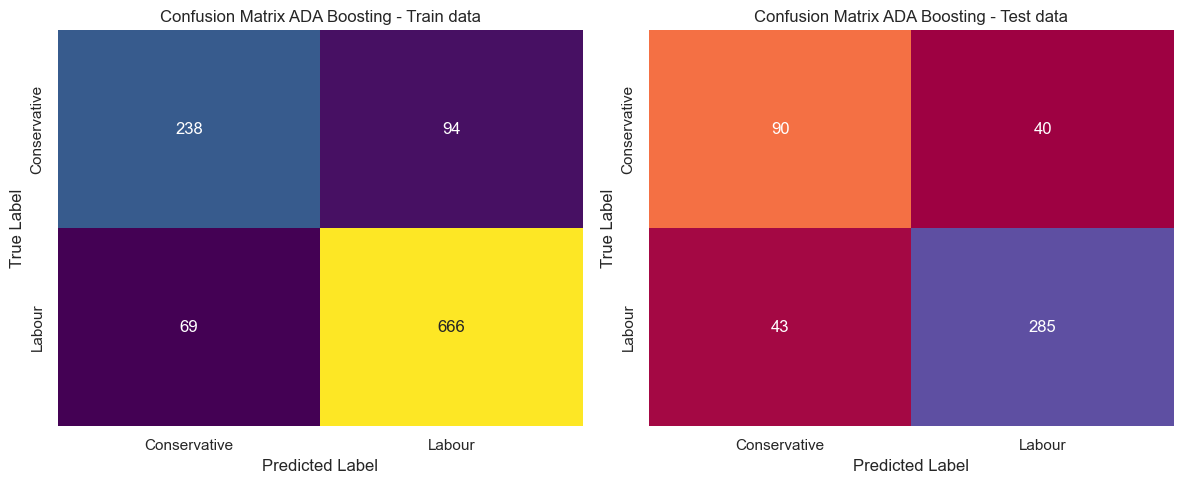

In [150]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix ADA Boosting - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix ADA Boosting - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.913
AUC for the Test Data: 0.879


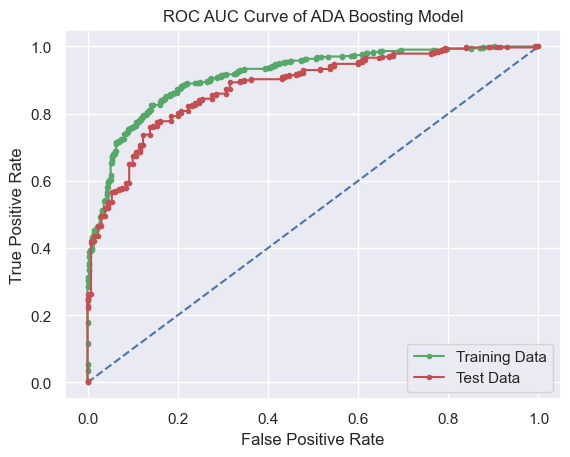

In [151]:
# AUC and ROC for the training data

# calculate AUC
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
ADB_train_auc=round(auc,2)
ADB_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = ADB_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
ADB_test_auc=round(auc,2)
ADB_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of ADA Boosting Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

### Random Forest

In [152]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1) 
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [153]:
RF_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [154]:
ytrain_predict = Logistic_model.predict(X_train)
ytest_predict = Logistic_model.predict(X_test)

In [155]:
ytrain_predict_prob=RF_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
340,0.00,1.00
741,0.86,0.14
240,0.07,0.93
601,0.02,0.98
1025,0.04,0.96


In [156]:
ytest_predict_prob =RF_model.predict_proba(X_train)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
937,0.96,0.04
170,0.05,0.95
891,0.22,0.78
563,0.07,0.93
586,0.02,0.98


In [157]:
RF_met_train1,RF_train_accu,RF_train_precision,RF_train_recall,RF_train_f1 = performance_matrices(RF_model, X_train, y_train, ytrain_predict)
RF_met_train_maj1,RF_train_accu_maj,RF_train_precision_maj,RF_train_recall_maj,RF_train_f1_maj = performance_matrices_maj(RF_model, X_train, y_train, ytrain_predict)
print ('RF_train_accu ',RF_train_accu)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_accu  1.0
RF_train_precision  0.77
RF_train_recall  0.69
RF_train_f1  0.73


In [158]:
print('Classification Report of Train data - Random Forest')
RF_met_train1

Classification Report of Train data - Random Forest


,precision,recall,f1-score,support
0,0.771044,0.689759,0.728140,332.000000
1,0.866234,0.907483,0.886379,735.000000
accuracy,0.839738,0.839738,0.839738,0.839738
macro avg,0.818639,0.798621,0.807259,1067.000000
weighted avg,0.836615,0.839738,0.837142,1067.000000


In [159]:
RF_met_test1,RF_test_accu,RF_test_precision,RF_test_recall,RF_test_f1 = performance_matrices(RF_model, X_test, y_test, ytest_predict)
RF_met_test_maj1,RF_test_accu_maj,RF_test_precision_maj,RF_test_recall_maj,RF_test_f1_maj = performance_matrices_maj(RF_model, X_test, y_test, ytest_predict)
print ('RF_test_accu ',RF_test_accu)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_accu  0.82
RF_test_precision  0.7
RF_test_recall  0.65
RF_test_f1  0.68


In [160]:
print('Classification Report of Test data - Random Forest')
RF_met_test1

Classification Report of Test data - Random Forest


,precision,recall,f1-score,support
0,0.702479,0.653846,0.677291,130.000000
1,0.866469,0.890244,0.878195,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.784474,0.772045,0.777743,458.000000
weighted avg,0.819922,0.823144,0.821170,458.000000


In [161]:
model_score=RF_model.score(X_train,y_train)
print(model_score)

print(' ')
print('Classification Report (Random Forest - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.9990627928772259
 
Classification Report (Random Forest - Train data)
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [162]:
model_score=RF_model.score(X_test,y_test)
print(model_score)

print(' ')
print('Classification Report (Random Forest - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8209606986899564
 
Classification Report (Random Forest - Test data)
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



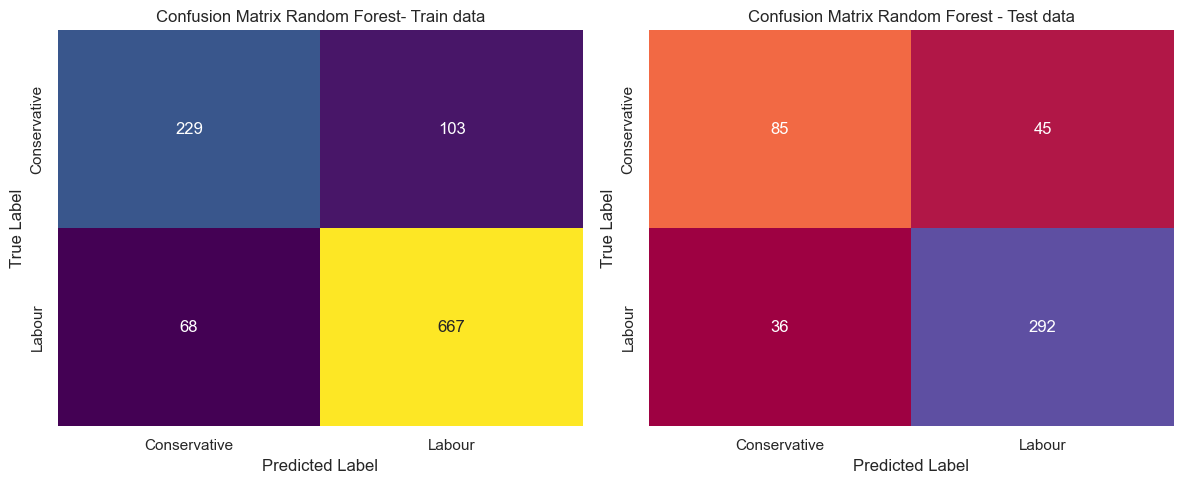

In [163]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Random Forest- Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Random Forest - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 1.000
AUC for the Test Data: 0.887


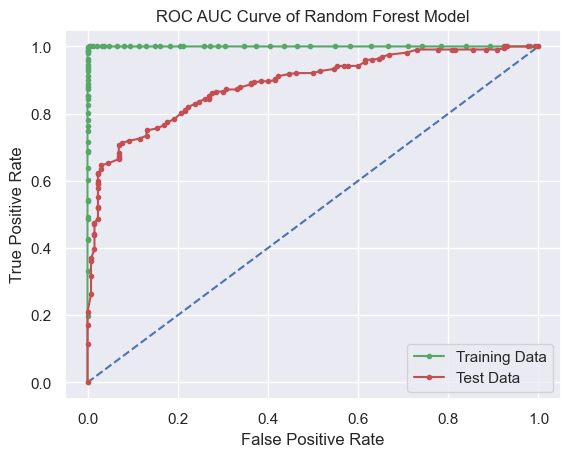

In [164]:
# AUC and ROC for the training data

# calculate AUC
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
RF_train_auc=round(auc,2)
RF_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = RF_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
RF_test_auc=round(auc,2)
RF_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of Random Forest Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

### Bagging with Random Forest

In [165]:
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train) 

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [166]:
Bagging_model.get_params()

{'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': {0: 4, 1: 1.5},
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 4,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(class_weight={0: 4, 1: 1.5}, min_samples_leaf=2,
                        min_samples_split=4),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'r

In [167]:
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [168]:
ytrain_predict_prob=Bagging_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
690,0.595082,0.404918
348,0.930812,0.069188
523,0.627474,0.372526
960,0.027400,0.972600
502,0.058190,0.941810


In [169]:
ytest_predict_prob=Bagging_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
329,0.080337,0.919663
314,0.129346,0.870654
25,0.552895,0.447105
79,0.293988,0.706012
105,0.125093,0.874907


In [170]:
Bagging_met_train1,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_train_maj1,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.9
Bagging_train_precision  0.83
Bagging_train_recall  0.88
Bagging_train_f1  0.85


In [171]:
print('Classification Report of Train data - Bagging')
Bagging_met_train1

Classification Report of Train data - Bagging


,precision,recall,f1-score,support
0,0.826705,0.876506,0.850877,332.000000
1,0.942657,0.917007,0.929655,735.000000
accuracy,0.904405,0.904405,0.904405,0.904405
macro avg,0.884681,0.896756,0.890266,1067.000000
weighted avg,0.906578,0.904405,0.905143,1067.000000


In [172]:
Bagging_met_test1,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_test_maj1,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.83
Bagging_test_precision  0.67
Bagging_test_recall  0.75
Bagging_test_f1  0.71


In [173]:
print('Classification Report of Test data - Bagging')
Bagging_met_test1

Classification Report of Test data - Bagging


,precision,recall,f1-score,support
0,0.671233,0.753846,0.710145,130.000000
1,0.897436,0.853659,0.875000,328.000000
accuracy,0.825328,0.825328,0.825328,0.825328
macro avg,0.784334,0.803752,0.792572,458.000000
weighted avg,0.833230,0.825328,0.828207,458.000000


In [174]:
## Performance Matrix on train data set
model_score = Bagging_model.score(X_train, y_train)                    
print(model_score)

print(' ')
print('Classification Report (Bagging - Train data)')
print(metrics.classification_report(y_train, ytrain_predict)) 

0.9044048734770385
 
Classification Report (Bagging - Train data)
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       332
           1       0.94      0.92      0.93       735

    accuracy                           0.90      1067
   macro avg       0.88      0.90      0.89      1067
weighted avg       0.91      0.90      0.91      1067



In [175]:
## Performance Matrix on test data set
model_score = Bagging_model.score(X_test, y_test)                  
print(model_score)

print(' ')
print('Classification Report (Bagging - Test data)')
print(metrics.classification_report(y_test, ytest_predict))   

0.8253275109170306
 
Classification Report (Bagging - Test data)
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       130
           1       0.90      0.85      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



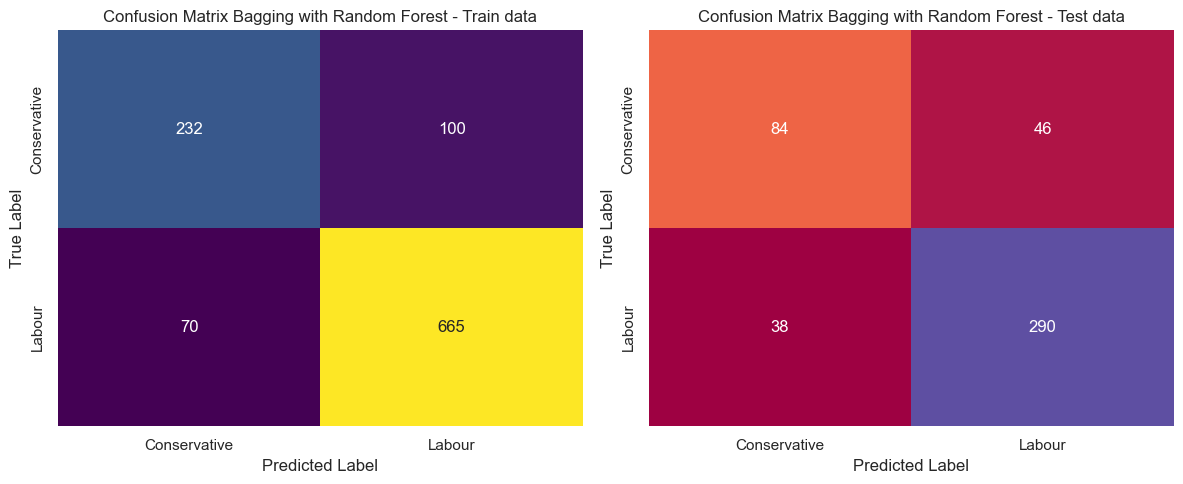

In [289]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Bagging with Random Forest - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Bagging with Random Forest - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   
plt.show();

AUC for the Training Data: 0.969
AUC for the Test Data: 0.902


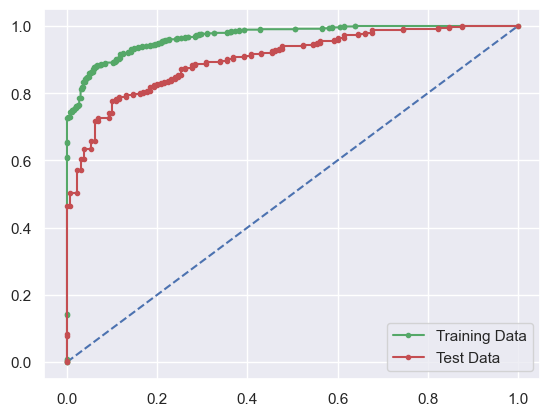

In [177]:
# calculate AUC
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
Bagging_train_auc=round(auc,2)
Bagging_train_auc_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 = Bagging_model.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
Bagging_test_auc=round(auc,2)
Bagging_test_auc_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.legend(loc='best')
plt.show()

### SMOTE

In [178]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [179]:
model['IsLabourOrNot'].value_counts()

1    1063
0     462
Name: IsLabourOrNot, dtype: int64

In [180]:
SM = SMOTE(random_state = 2) 
X_train_res, y_train_res = SM.fit_resample(X_train, y_train.ravel())
X_train_res1, y_train_res1 = SM.fit_resample(X_train, y_train.ravel())


In [181]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 8)
After SMOTE:  (1470, 8)


### Logistic Regression with SMOTE

In [182]:
log_res_model = LogisticRegression()
log_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [183]:
ytrain_predict = log_res_model.predict(X_train_res)
ytest_predict = log_res_model.predict(X_test)

In [184]:
log_test_met2,log_res_test_accu,log_res_test_precision,log_res_test_recall,log_res_test_f1 = performance_matrices(log_res_model, X_test, y_test, ytest_predict)
print ('log_res_test_accu ',log_res_test_accu)
print ('log_res_test_precision ',log_res_test_precision)
print ('log_res_test_recall ',log_res_test_recall)
print ('log_res_test_f1 ',log_res_test_f1)

log_res_test_accu  0.8
log_res_test_precision  0.61
log_res_test_recall  0.79
log_res_test_f1  0.69


In [185]:
print('Classification Report - Logistic Regression - SMOTE')
log_test_met2

Classification Report - Logistic Regression - SMOTE


,precision,recall,f1-score,support
0,0.613095,0.792308,0.691275,130.000000
1,0.906897,0.801829,0.851133,328.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.759996,0.797068,0.771204,458.000000
weighted avg,0.823503,0.799127,0.805758,458.000000


In [186]:
print('Classification Report - Logistic Regresion (First)')
logit_test_met1

Classification Report - Logistic Regresion (First)


,precision,recall,f1-score,support
0,0.702479,0.653846,0.677291,130.000000
1,0.866469,0.890244,0.878195,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.784474,0.772045,0.777743,458.000000
weighted avg,0.819922,0.823144,0.821170,458.000000


### LDA with SMOTE

In [187]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)

LinearDiscriminantAnalysis()

In [188]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [189]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.8
LDA_res_test_precision  0.62
LDA_res_test_recall  0.8
LDA_res_test_f1  0.7


In [190]:
print('Classification Report - LDA Regression - SMOTE')
LDA_test_met2

Classification Report - LDA Regression - SMOTE


,precision,recall,f1-score,support
0,0.619048,0.800000,0.697987,130.000000
1,0.910345,0.804878,0.854369,328.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.764696,0.802439,0.776178,458.000000
weighted avg,0.827662,0.803493,0.809981,458.000000


In [191]:
print('Classification Report - LDA Regresion (First)')
LDA_test_met1

Classification Report - LDA Regresion (First)


,precision,recall,f1-score,support
0,0.688000,0.661538,0.674510,130.000000
1,0.867868,0.881098,0.874433,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.777934,0.771318,0.774471,458.000000
weighted avg,0.816814,0.818777,0.817686,458.000000


### KNN with SMOTE

In [192]:
X_train_res1[['age',' economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']]= X_train_res1[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']].apply(zscore)

In [193]:
KNN_res_model=KNeighborsClassifier(n_neighbors=9)
KNN_res_model.fit(X_train_res1,y_train_res1)

KNeighborsClassifier(n_neighbors=9)

In [194]:
ytrain_predict = KNN_res_model.predict(X_train_res1)
ytest_predict = KNN_res_model.predict(X_test1)

In [195]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test1, y_test1, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.78
KNN_res_test_precision  0.57
KNN_res_test_recall  0.87
KNN_res_test_f1  0.69


In [196]:
print('Classification Report - KNN SMOTE')
KNN_test_met2

Classification Report - KNN SMOTE


,precision,recall,f1-score,support
0,0.573604,0.869231,0.691131,130.000000
1,0.934866,0.743902,0.828523,328.000000
accuracy,0.779476,0.779476,0.779476,0.779476
macro avg,0.754235,0.806567,0.759827,458.000000
weighted avg,0.832324,0.779476,0.789525,458.000000


In [197]:
print('Classification Report - KNN (First)')
KNN_test_met1

Classification Report - KNN (First)


,precision,recall,f1-score,support
0,0.729508,0.684615,0.706349,130.000000
1,0.877976,0.899390,0.888554,328.000000
accuracy,0.838428,0.838428,0.838428,0.838428
macro avg,0.803742,0.792003,0.797452,458.000000
weighted avg,0.835835,0.838428,0.836837,458.000000


### MNB with SMOTE

In [198]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [199]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [200]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.74
MNB_res_test_precision  0.53
MNB_res_test_recall  0.81
MNB_res_test_f1  0.64


In [201]:
print('Classification Report - MNB SMOTE')
MNB_test_met2

Classification Report - MNB SMOTE


,precision,recall,f1-score,support
0,0.532995,0.807692,0.642202,130.000000
1,0.904215,0.719512,0.801358,328.000000
accuracy,0.744541,0.744541,0.744541,0.744541
macro avg,0.718605,0.763602,0.721780,458.000000
weighted avg,0.798847,0.744541,0.756183,458.000000


In [202]:
print('Classification Report - MNB (First)')
MNB_test_met1

Classification Report - MNB (First)


,precision,recall,f1-score,support
0,0.671875,0.661538,0.666667,130.000000
1,0.866667,0.871951,0.869301,328.000000
accuracy,0.812227,0.812227,0.812227,0.812227
macro avg,0.769271,0.766745,0.767984,458.000000
weighted avg,0.811376,0.812227,0.811785,458.000000


### Hyperparameter tuning using GridsearchCV
### Logistic Regression with GridSearchCV

In [203]:
class_weight = dict({0:2, 1:1})
model_1 = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
               ,'tol':[0.0001,0.00001]
              }
logit_model3 = GridSearchCV(model_1, param_grid = grid_values,cv = 10,n_jobs=-1)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1}),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05]})

In [204]:
print("Best Parametres from",logit_model3.best_estimator_)

Best Parametres from LogisticRegression(C=0.07847599703514611, class_weight={0: 2, 1: 1},
                   solver='newton-cg')


In [205]:
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [206]:
ytrain_predict_prob=logit_model3.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
373,0.970378,0.029622
42,0.813745,0.186255
941,0.696255,0.303745
131,0.166373,0.833627
547,0.888784,0.111216


In [207]:
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.82
logit_train_precision  0.69
logit_train_recall  0.8
logit_train_f1  0.74


In [208]:
print('Classification Report of Train data - Logistic Regression - GridSearchCV')
logit_train_met3

Classification Report of Train data - Logistic Regression - GridSearchCV


,precision,recall,f1-score,support
0,0.689295,0.795181,0.738462,332.000000
1,0.900585,0.838095,0.868217,735.000000
accuracy,0.824742,0.824742,0.824742,0.824742
macro avg,0.794940,0.816638,0.803339,1067.000000
weighted avg,0.834841,0.824742,0.827843,1067.000000


In [209]:
print('Classification Report of Train data - Logistic Regression (First)')
logit_train_met1

Classification Report of Train data - Logistic Regression (First)


,precision,recall,f1-score,support
0,0.771044,0.689759,0.728140,332.000000
1,0.866234,0.907483,0.886379,735.000000
accuracy,0.839738,0.839738,0.839738,0.839738
macro avg,0.818639,0.798621,0.807259,1067.000000
weighted avg,0.836615,0.839738,0.837142,1067.000000


In [210]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.65
logit_test_f1  0.68


In [211]:
ytest_predict_prob=logit_model3.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
455,0.961801,0.038199
45,0.046377,0.953623
300,0.873777,0.126223
42,0.814130,0.185870
53,0.137195,0.862805


In [212]:
print('Classification Report of Test data - Logistic Regression - GridSearchCV')
logit_test_met3

Classification Report of Test data - Logistic Regression - GridSearchCV


,precision,recall,f1-score,support
0,0.629630,0.784615,0.698630,130.00000
1,0.905405,0.817073,0.858974,328.00000
accuracy,0.807860,0.807860,0.807860,0.80786
macro avg,0.767518,0.800844,0.778802,458.00000
weighted avg,0.827128,0.807860,0.813462,458.00000


In [213]:
print('Classification Report of Test data - Logistic Regression (First)')
logit_test_met1

Classification Report of Test data - Logistic Regression (First)


,precision,recall,f1-score,support
0,0.702479,0.653846,0.677291,130.000000
1,0.866469,0.890244,0.878195,328.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.784474,0.772045,0.777743,458.000000
weighted avg,0.819922,0.823144,0.821170,458.000000


In [214]:
model_score=logit_model3.score(X_train,y_train)
print(model_score)

print(' ')
print('Classification Report (Logistic Regression GridsearchCV - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.8247422680412371
 
Classification Report (Logistic Regression GridsearchCV - Train data)
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       332
           1       0.90      0.84      0.87       735

    accuracy                           0.82      1067
   macro avg       0.79      0.82      0.80      1067
weighted avg       0.83      0.82      0.83      1067



In [215]:
model_score=logit_model3.score(X_test,y_test)
print(model_score)

print(' ')
print('Classification Report (Logistic Regression GridsearchCV - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8078602620087336
 
Classification Report (Logistic Regression GridsearchCV - Test data)
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       130
           1       0.91      0.82      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.80      0.78       458
weighted avg       0.83      0.81      0.81       458



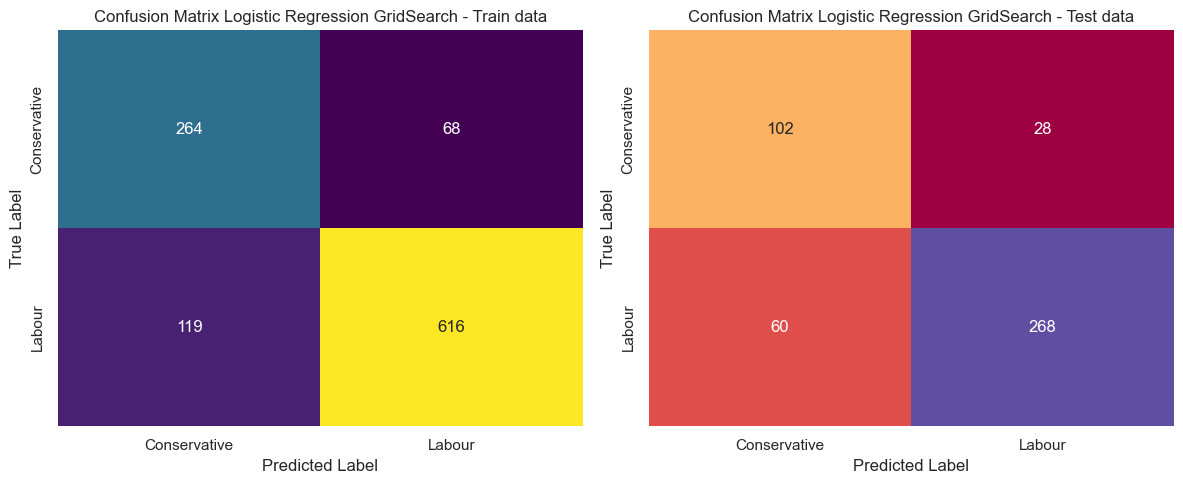

In [216]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix Logistic Regression GridSearch - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix Logistic Regression GridSearch - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   

plt.show();

AUC for the Training Data: 0.890
AUC for the Test Data: 0.885


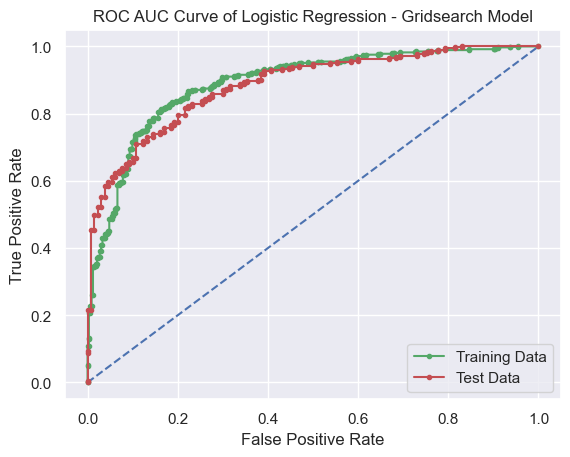

In [217]:
# AUC and ROC for the training data

# calculate AUC
probs = logit_model3.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
logit_train_auc3=round(auc,2)
logit_train_auc_maj3=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 =logit_model3.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
logit_test_auc3=round(auc,2)
logit_test_auc_maj3=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of Logistic Regression - Gridsearch Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

### LDA with GridSearchCV

In [218]:
model_1 = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(model_1, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [219]:
print("Best Parameters from LDA ",LDA_model3.best_params_)

Best Parameters from LDA  {'solver': 'svd', 'tol': 0.0001}


In [220]:
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [221]:
ytrain_predict_prob=LDA_model3.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
276,0.043918,0.956082
536,0.104799,0.895201
557,0.018047,0.981953
992,0.188091,0.811909
690,0.692219,0.307781


In [222]:
ytest_predict_prob=LDA_model3.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
447,0.352823,0.647177
60,0.425605,0.574395
71,0.943275,0.056725
456,0.015600,0.984400
443,0.066249,0.933751


In [223]:
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
LDA_train_met_maj3,LDA_train_accu_maj3,LDA_train_precision_maj3,LDA_train_recall_maj3,LDA_train_f1_maj3 = performance_matrices_maj(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.84
LDA_train_precision  0.76
LDA_train_recall  0.7
LDA_train_f1  0.73


In [224]:
print('Classification Report of Train data - LDA with GridSearchCV')
LDA_train_met3

Classification Report of Train data - LDA with GridSearchCV


,precision,recall,f1-score,support
0,0.756494,0.701807,0.728125,332.000000
1,0.869565,0.897959,0.883534,735.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.813029,0.799883,0.805830,1067.000000
weighted avg,0.834383,0.836926,0.835178,1067.000000


In [225]:
print('Classification Report of Train data - LDA (First)')
LDA_train_met1

Classification Report of Train data - LDA (First)


,precision,recall,f1-score,support
0,0.756494,0.701807,0.728125,332.000000
1,0.869565,0.897959,0.883534,735.000000
accuracy,0.836926,0.836926,0.836926,0.836926
macro avg,0.813029,0.799883,0.805830,1067.000000
weighted avg,0.834383,0.836926,0.835178,1067.000000


In [226]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
LDA_test_met_maj3,LDA_test_accu_maj3,LDA_test_precision_maj3,LDA_test_recall_maj3,LDA_test_f1_maj3 = performance_matrices_maj(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.82
LDA_test_precision  0.69
LDA_test_recall  0.66
LDA_test_f1  0.67


In [227]:
print('Classification Report of Test data - LDA with GridSearchCV')
LDA_test_met3

Classification Report of Test data - LDA with GridSearchCV


,precision,recall,f1-score,support
0,0.688000,0.661538,0.674510,130.000000
1,0.867868,0.881098,0.874433,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.777934,0.771318,0.774471,458.000000
weighted avg,0.816814,0.818777,0.817686,458.000000


In [228]:
print('Classification Report of Test data - LDA (First)')
LDA_test_met1

Classification Report of Test data - LDA (First)


,precision,recall,f1-score,support
0,0.688000,0.661538,0.674510,130.000000
1,0.867868,0.881098,0.874433,328.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.777934,0.771318,0.774471,458.000000
weighted avg,0.816814,0.818777,0.817686,458.000000


In [229]:
model_score=LDA_model3.score(X_train,y_train)
print(model_score)

print(' ')
print('Classification Report (LDA with GridSearchCV - Train data)')
print(metrics.classification_report(y_train,ytrain_predict))

0.8369259606373008
 
Classification Report (LDA with GridSearchCV - Train data)
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



In [230]:
model_score=LDA_model3.score(X_test,y_test)
print(model_score)

print(' ')
print('Classification Report (LDA with GridSearchCV - Test data)')
print(metrics.classification_report(y_test,ytest_predict))

0.8187772925764192
 
Classification Report (LDA with GridSearchCV - Test data)
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



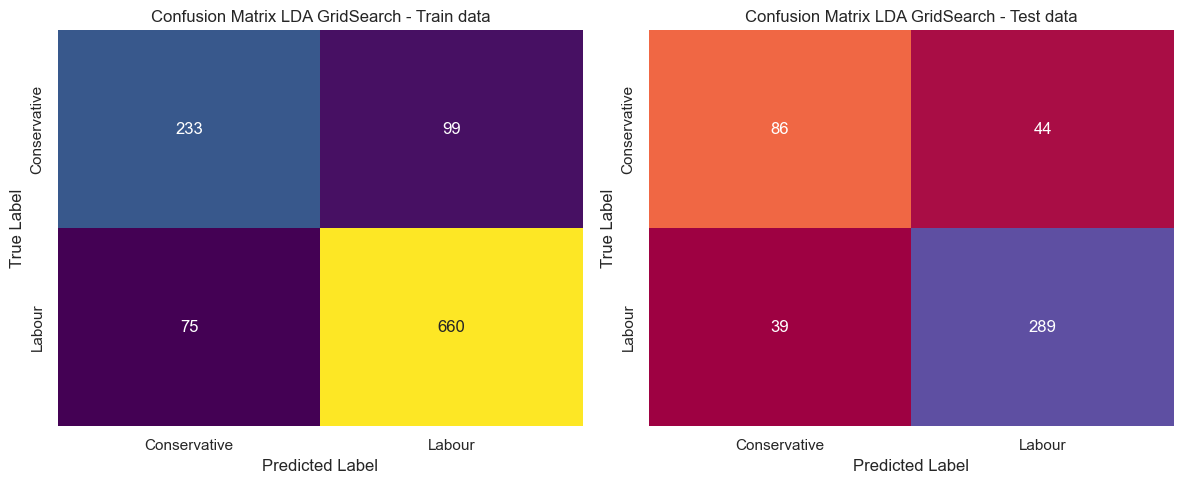

In [231]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix LDA GridSearch - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix LDA GridSearch - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   

plt.show();

AUC for the Training Data: 0.889
AUC for the Test Data: 0.884


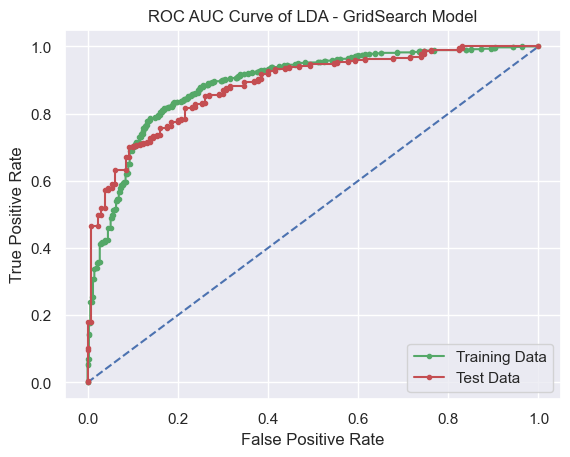

In [232]:
# AUC and ROC for the training data

# calculate AUC
probs = LDA_model3.predict_proba(X_train)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
LDA_train_auc3=round(auc,2)
LDA_train_auc3_maj=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 =LDA_model3.predict_proba(X_test)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
LDA_test_auc3=round(auc,2)
LDA_test_auc3_maj=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of LDA - GridSearch Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

### KNN GridSearchCV

In [233]:
X1=model.drop('IsLabourOrNot',axis=1)
y1=model['IsLabourOrNot']

In [234]:
X1[['age',' economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']]= X1[['age','economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']].apply(zscore)
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1, test_size=0.30,random_state=1)

In [235]:
model_1 = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20,2),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(model_1, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20, 2),
                         'weights': ['uniform']})

In [236]:
print("Best Parameters from KNN Model",KNN_model3.best_params_)

Best Parameters from KNN Model {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}


In [237]:
ytrain_predict = KNN_model3.predict(X_train1)
ytest_predict = KNN_model3.predict(X_test1)

In [238]:
ytrain_predict_prob=KNN_model3.predict_proba(X_train1)
pd.DataFrame(ytrain_predict_prob).sample(5)

,0,1
184,0.052632,0.947368
61,0.473684,0.526316
651,0.157895,0.842105
1024,0.894737,0.105263
513,0.368421,0.631579


In [239]:
ytest_predict_prob=KNN_model3.predict_proba(X_test1)
pd.DataFrame(ytest_predict_prob).sample(5)

,0,1
248,0.421053,0.578947
444,0.842105,0.157895
101,0.052632,0.947368
405,0.000000,1.000000
387,0.105263,0.894737


In [240]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train1, y_train1, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train1, y_train1, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.84
KNN_train_precision  0.77
KNN_train_recall  0.7
KNN_train_f1  0.73


In [241]:
print('Classification Report of Train data - KNN GridSearchCV')
KNN_train_met3

Classification Report of Train data - KNN GridSearchCV


,precision,recall,f1-score,support
0,0.768212,0.698795,0.731861,332.000000
1,0.869281,0.904762,0.886667,735.000000
accuracy,0.840675,0.840675,0.840675,0.840675
macro avg,0.818746,0.801779,0.809264,1067.000000
weighted avg,0.837833,0.840675,0.838499,1067.000000


In [242]:
print('Classification Report of Train data - KNN (First)')
KNN_train_met1

Classification Report of Train data - KNN (First)


,precision,recall,f1-score,support
0,0.789831,0.701807,0.743222,332.00000
1,0.871762,0.915646,0.893165,735.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.830796,0.808727,0.818193,1067.00000
weighted avg,0.846269,0.849110,0.846510,1067.00000


In [243]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test1, y_test1, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test1, y_test1, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.82
KNN_test_precision  0.69
KNN_test_recall  0.65
KNN_test_f1  0.67


In [244]:
print('Classification Report of Test data - KNN GridSearchCV')
KNN_test_met3

Classification Report of Test data - KNN GridSearchCV


,precision,recall,f1-score,support
0,0.688525,0.646154,0.666667,130.000000
1,0.863095,0.884146,0.873494,328.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.775810,0.765150,0.770080,458.000000
weighted avg,0.813545,0.816594,0.814788,458.000000


In [245]:
print('Classification Report of Test data - KNN (First)')
KNN_test_met1

Classification Report of Test data - KNN (First)


,precision,recall,f1-score,support
0,0.729508,0.684615,0.706349,130.000000
1,0.877976,0.899390,0.888554,328.000000
accuracy,0.838428,0.838428,0.838428,0.838428
macro avg,0.803742,0.792003,0.797452,458.000000
weighted avg,0.835835,0.838428,0.836837,458.000000


In [246]:
model_score=KNN_model3.score(X_train1,y_train1)
print(model_score)

print(' ')
print('Classification Report (KNN GridSearchCV - Train data')
print(metrics.classification_report(y_train1,ytrain_predict))

0.8406747891283973
 
Classification Report (KNN GridSearchCV - Train data
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [247]:
model_score=LDA_model3.score(X_test,y_test1)
print(model_score)

print(' ')
print('Classification Report (KNN GridSearchCV - Test data')
print(metrics.classification_report(y_test1,ytest_predict))

0.8187772925764192
 
Classification Report (KNN GridSearchCV - Test data
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       130
           1       0.86      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.81       458



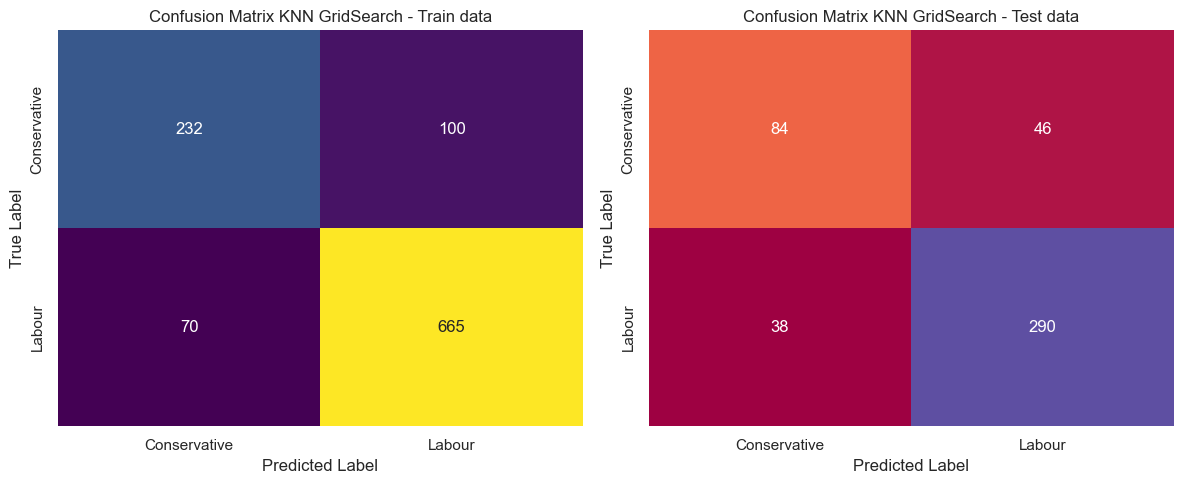

In [248]:
fig, axes = plt.subplots(nrows=1,ncols=2,squeeze=False)
fig.set_size_inches(12,5);
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar=False,fmt='.5g',cmap='viridis',ax=axes[0][0],xticklabels = ["Conservative", "Labour"] ,
yticklabels = ["Conservative", "Labour"]).set(title='Confusion Matrix KNN GridSearch - Train data',xlabel = 'Predicted Label',ylabel ='True Label')

sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,cbar=False,fmt='.5g',cmap='Spectral',ax=axes[0][1]
           ,xticklabels=['Conservative','Labour'],yticklabels=["Conservative", "Labour"]).set(title='Confusion Matrix KNN GridSearch - Test data',xlabel = 'Predicted Label',ylabel ='True Label')
plt.tight_layout();   

plt.show();

AUC for the Training Data: 0.902
AUC for the Test Data: 0.894


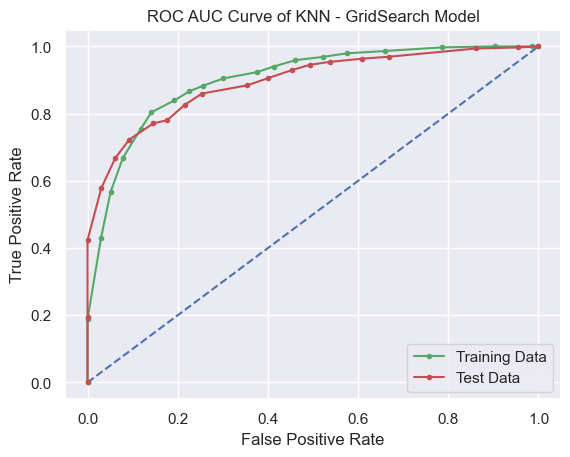

In [249]:
# AUC and ROC for the training data

# calculate AUC
probs = KNN_model3.predict_proba(X_train1)
probs = probs[:, 1]
auc = metrics.roc_auc_score(y_train,probs)
KNN_train_auc3=round(auc,2)
KNN_train_auc_maj3=round(auc,2)
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='dashed')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color = 'g')


# AUC and ROC for the test data

# calculate AUC
probs1 =KNN_model3.predict_proba(X_test1)
 # keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
auc = metrics.roc_auc_score(y_test,probs1)
KNN_test_auc3=round(auc,2)
KNN_test_auc_maj3=round(auc,2)
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs1)
#plt.plot([0, 1], [0, 1], linestyle='--',color ='')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',ls ='solid',label='Test Data',color ='r')
# show the plot
plt.title('ROC AUC Curve of KNN - GridSearch Model')
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
sns.set(font_scale=1)
plt.show()

## Cross Validation of all final models

### Logistic Regression

In [250]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_model, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.78504673, 0.8317757 , 0.86915888, 0.85046729, 0.8317757 ,
       0.8317757 , 0.78504673, 0.9245283 , 0.82075472, 0.80188679])

In [251]:
logit_train_CVmean = scores.mean()
logit_train_CVstd = scores.std()
print("Logit Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.83 +/- 0.04


In [252]:
scores = cross_val_score(Logistic_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.82608696, 0.86956522, 0.80434783, 0.7826087 , 0.82608696,
       0.80434783, 0.84782609, 0.89130435, 0.88888889, 0.75555556])

In [253]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.83 +/- 0.04


### LDA 

In [254]:
scores = cross_val_score(LDA_model3, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.78504673, 0.82242991, 0.85981308, 0.8317757 , 0.8411215 ,
       0.82242991, 0.80373832, 0.9245283 , 0.82075472, 0.80188679])

In [255]:
LDA_train_CVmean = scores.mean()
LDA_train_CVstd = scores.std()
print("LDA Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

LDA Train Accuracy: 0.83 +/- 0.04


In [256]:
scores = cross_val_score(LDA_model3, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.82608696, 0.84782609, 0.80434783, 0.80434783, 0.82608696,
       0.80434783, 0.84782609, 0.84782609, 0.91111111, 0.75555556])

In [257]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.83 +/- 0.04


### KNN

In [258]:
scores = cross_val_score(KNN_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.78231293, 0.78911565, 0.85714286, 0.82993197, 0.83673469,
       0.82312925, 0.8707483 , 0.89795918, 0.8707483 , 0.87755102])

In [259]:
KNN_train_CVmean = scores.mean()
KNN_train_CVstd = scores.std()
print("KNN Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN Train Accuracy: 0.84 +/- 0.04


In [260]:
scores = cross_val_score(KNN_model, X_test1, y_test, cv=10,n_jobs=-1)
scores

array([0.80434783, 0.73913043, 0.7826087 , 0.84782609, 0.7826087 ,
       0.80434783, 0.89130435, 0.80434783, 0.77777778, 0.75555556])

In [261]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.80 +/- 0.04


### MNB

In [262]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10,n_jobs=-1)
scores

array([0.77570093, 0.81308411, 0.80373832, 0.80373832, 0.81308411,
       0.8411215 , 0.79439252, 0.81132075, 0.81132075, 0.80188679])

In [263]:
MNB_train_CVmean = scores.mean()
MNB_train_CVstd = scores.std()
print("MNB Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

MNB Train Accuracy: 0.81 +/- 0.02


In [264]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.80434783, 0.84782609, 0.76086957, 0.7826087 , 0.82608696,
       0.80434783, 0.82608696, 0.84782609, 0.86666667, 0.71111111])

In [265]:
MNB_test_CVmean = scores.mean()
MNB_test_CVstd = scores.std()
print("MNB Test Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

MNB Test Accuracy: 0.81 +/- 0.04


### Bagging with RF

In [266]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.82312925, 0.82993197, 0.85714286, 0.83673469, 0.87755102,
       0.89115646, 0.8707483 , 0.91836735, 0.86394558, 0.88435374])

In [267]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVstd = scores.std()
print("Bagging Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std() ))

Bagging Train Accuracy: 0.87 +/- 0.03


In [268]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.86956522, 0.86956522, 0.82608696, 0.80434783, 0.82608696,
       0.80434783, 0.91304348, 0.91304348, 0.86666667, 0.82222222])

In [269]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVstd = scores.std() 
print("Bagging Test Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.85 +/- 0.04


### ADA Boost

In [270]:
scores = cross_val_score(ADB_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.76190476, 0.80272109, 0.80952381, 0.83673469, 0.82312925,
       0.9047619 , 0.82993197, 0.86394558, 0.88435374, 0.82312925])

In [271]:
ADB_train_CVmean = scores.mean()
ADB_train_CVstd = scores.std() 
print("AdaBoost Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std() ))

AdaBoost Train Accuracy: 0.83 +/- 0.04


In [272]:
scores = cross_val_score(ADB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.82608696, 0.82608696, 0.7826087 , 0.76086957, 0.76086957,
       0.76086957, 0.82608696, 0.82608696, 0.88888889, 0.77777778])

In [273]:
ADB_test_CVmean = scores.mean()
ADB_test_CVstd = scores.std() 
print("Ada Boost Test Accuracy: %0.2f +/- %0.2f" % (ADB_test_CVmean, ADB_test_CVstd))

Ada Boost Test Accuracy: 0.80 +/- 0.04


### GB Model

In [274]:
scores = cross_val_score(GB_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.78231293, 0.78231293, 0.85714286, 0.86394558, 0.83673469,
       0.86394558, 0.88435374, 0.95238095, 0.89115646, 0.89795918])

In [275]:
GB_train_CVmean = scores.mean()
GB_train_CVstd = scores.std() 
print("Gradient Boosting Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std() ))

Gradient Boosting Train Accuracy: 0.86 +/- 0.05


In [276]:
scores = cross_val_score(GB_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.76086957, 0.80434783, 0.7173913 , 0.73913043, 0.67391304,
       0.80434783, 0.86956522, 0.80434783, 0.73333333, 0.77777778])

In [277]:
GB_test_CVmean = scores.mean()
GB_test_CVstd = scores.std() 
print("Gradient Boosting Test Accuracy: %0.2f +/- %0.2f" % (GB_test_CVmean, GB_test_CVstd))

Gradient Boosting Test Accuracy: 0.77 +/- 0.05


### Random Forest

In [278]:
scores = cross_val_score(RF_model, X_train_res, y_train_res, cv=10,n_jobs=-1)
scores

array([0.81632653, 0.80952381, 0.87755102, 0.8707483 , 0.8707483 ,
       0.9047619 , 0.9047619 , 0.91156463, 0.89115646, 0.9047619 ])

In [279]:
RF_train_CVmean = scores.mean()
RF_train_CVstd = scores.std()
print("RF Train Accuracy: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

RF Train Accuracy: 0.88 +/- 0.03


In [280]:
scores = cross_val_score(RF_model, X_test, y_test, cv=10,n_jobs=-1)
scores

array([0.80434783, 0.84782609, 0.82608696, 0.84782609, 0.76086957,
       0.82608696, 0.91304348, 0.84782609, 0.86666667, 0.82222222])

In [281]:
RF_test_CVmean = scores.mean()
RF_test_CVstd = scores.std()
print("RF Test Accuracy: %0.2f +/- %0.2f" % (RF_test_CVmean, RF_test_CVstd))

RF Test Accuracy: 0.84 +/- 0.04


## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model


In [282]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']

In [283]:
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu,logit_train_auc,logit_train_recall,logit_train_recall_maj,
                                               logit_train_precision,logit_train_precision_maj,logit_train_f1,logit_train_f1_maj]},index=index)

In [284]:
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu,logit_train_auc,logit_train_recall,logit_train_recall_maj,logit_train_precision,logit_train_precision_maj,logit_train_f1,logit_train_f1_maj],
                     'LDA Train':[LDA_train_accu3,LDA_train_auc3,LDA_train_recall3,LDA_train_recall_maj3,LDA_train_precision3,LDA_train_precision_maj3,LDA_train_f13,LDA_train_f1_maj3],
                     'RF Train':[RF_train_accu,RF_train_auc,RF_train_recall,RF_train_recall_maj,RF_train_precision,RF_train_precision_maj,RF_train_f1,RF_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'Gradient Boosting Train':[GB_train_accu,GB_train_auc,GB_train_recall,GB_train_recall_maj,GB_train_precision,GB_train_precision_maj,GB_train_f1,GB_train_f1_maj],
                     'AdaBoost Train':[ADB_train_accu,ADB_train_auc,ADB_train_recall,ADB_train_recall_maj,ADB_train_precision,ADB_train_precision_maj,ADB_train_f1,ADB_train_f1_maj]},index=index)
round(train_perf_data,2).T

,Accuracy,AUC,Recall-0,Recall-1,Precision-0,Precision-1,F1 Score-0,F1 Score-1
Logit Train,0.84,0.89,0.69,0.91,0.77,0.87,0.73,0.89
LDA Train,0.84,0.89,0.70,0.90,0.76,0.87,0.73,0.88
RF Train,1.00,1.00,0.69,0.91,0.77,0.87,0.73,0.89
KNN Train,0.84,0.90,0.70,0.90,0.77,0.87,0.73,0.89
MNB Train,0.81,0.86,0.63,0.89,0.71,0.84,0.67,0.86
Bagging Train,0.90,0.97,0.88,0.92,0.83,0.94,0.85,0.93
Gradient Boosting Train,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
AdaBoost Train,0.85,0.91,0.72,0.91,0.78,0.88,0.74,0.89


In [285]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu,logit_test_auc,logit_test_recall,logit_test_recall_maj,logit_test_precision,logit_test_precision_maj,logit_test_f1,logit_test_f1_maj],
                     'LDA Test':[LDA_test_accu3,LDA_test_auc3,LDA_test_recall3,LDA_test_recall_maj3,LDA_test_precision3,LDA_test_precision_maj3,LDA_test_f13,LDA_test_f1_maj3],
                     'RF Test':[RF_test_accu,RF_test_auc,RF_test_recall,RF_test_recall_maj,RF_test_precision,RF_test_precision_maj,RF_test_f1,RF_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'Gradient Boosting Test':[GB_test_accu,GB_test_auc,GB_test_recall,GB_test_recall_maj,GB_test_precision,GB_test_precision_maj,GB_test_f1,GB_test_f1_maj],
                     'AdaBoost Test':[ADB_train_accu,ADB_train_auc,ADB_train_recall,ADB_train_recall_maj,ADB_train_precision,ADB_train_precision_maj,ADB_train_f1,ADB_train_f1_maj]},index=index)
round(test_perf_data,2).T

,Accuracy,AUC,Recall-0,Recall-1,Precision-0,Precision-1,F1 Score-0,F1 Score-1
Logit Test,0.82,0.88,0.65,0.89,0.70,0.87,0.68,0.88
LDA Test,0.82,0.88,0.66,0.88,0.69,0.87,0.67,0.87
RF Test,0.82,0.89,0.65,0.89,0.70,0.87,0.68,0.88
KNN Test,0.82,0.89,0.65,0.88,0.69,0.86,0.67,0.87
MNB Test,0.81,0.85,0.66,0.87,0.67,0.87,0.67,0.87
Bagging Test,0.83,0.90,0.75,0.85,0.67,0.90,0.71,0.88
Gradient Boosting Test,0.79,0.85,0.69,0.84,0.62,0.87,0.66,0.85
AdaBoost Test,0.85,0.91,0.72,0.91,0.78,0.88,0.74,0.89


In [286]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'RF Train':[RF_train_CVmean,RF_train_CVstd],
                     'RF Test':[RF_test_CVmean,RF_test_CVstd],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVstd],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVstd],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVstd],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVstd],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVstd],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVstd],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVstd],
                     'GB Train':[GB_train_CVmean,GB_train_CVstd],
                     'GB Test':[GB_test_CVmean,GB_test_CVstd],
                     'ADB Train':[ADB_train_CVmean,ADB_train_CVstd],
                     'ADB Test':[ADB_test_CVmean,ADB_test_CVstd]},index=index)
round(CV_data,2)

,Logit Train,Logit Test,RF Train,RF Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,Bagging Train,Bagging Test,GB Train,GB Test,ADB Train,ADB Test
CV Mean Accuracy,0.83,0.83,0.88,0.84,0.83,0.83,0.84,0.80,0.81,0.81,0.87,0.85,0.86,0.77,0.83,0.80
CV Std Deviation,0.04,0.04,0.03,0.04,0.04,0.04,0.04,0.04,0.02,0.04,0.03,0.04,0.05,0.05,0.04,0.04


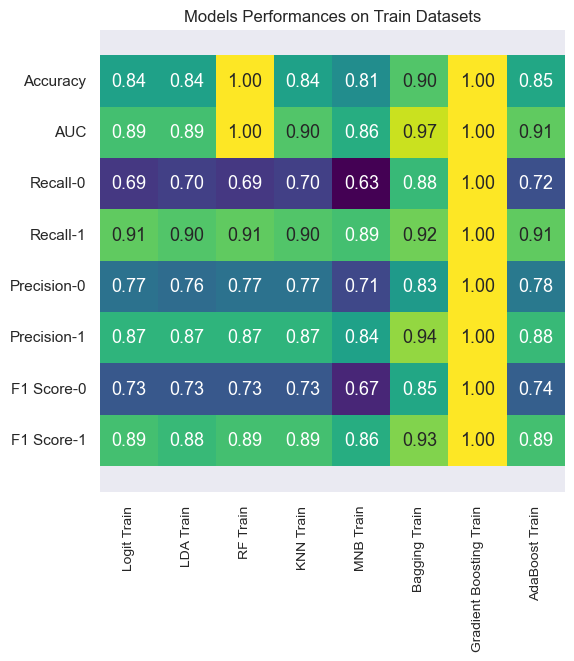

In [287]:
from matplotlib.patches import Rectangle
plt.subplots(figsize=(6,6))
ax = sns.heatmap(train_perf_data, cmap='viridis', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=10)
plt.title('Models Performances on Train Datasets');

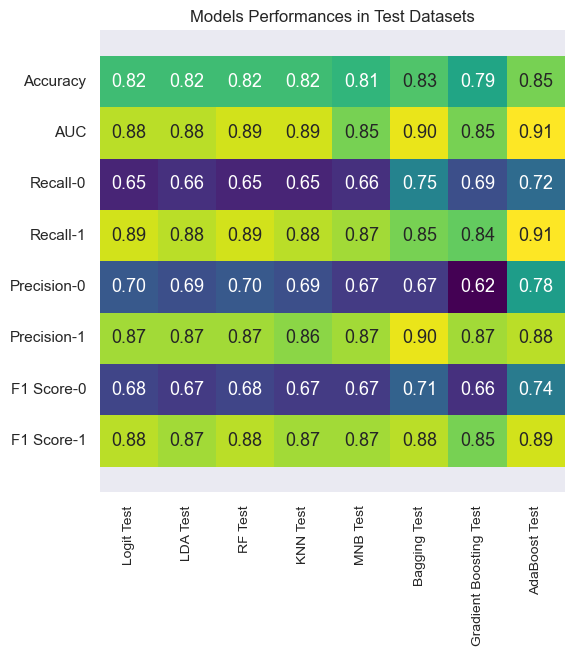

In [288]:
plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_perf_data, cmap='viridis', annot=True, fmt='.2f',annot_kws={"fontsize":13}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90,fontsize=10)
plt.title('Models Performances in Test Datasets');